___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
# from scipy.stats import zscore
# from scipy import stats
# from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}






#### *ii. Load Dataset*

In [86]:
df0 = pd.read_csv("treetypes.csv")
df = df0.copy()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [87]:
pd.options.display.float_format = '{:,.10f}'.format

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [89]:

df.describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,"250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000","250,000.0000000000"
mean,"2,748.5051600000",156.2121720000,16.3310520000,228.0940320000,50.8978200000,"1,719.9665760000",212.3704880000,218.5107000000,134.5027640000,"1,521.7569040000",0.2383000000,0.0333600000,0.4178240000,0.3086920000,0.0183440000,0.0358640000,0.0583760000,0.0469200000,0.0090360000,0.0373960000,0.0000600000,0.0000920000,0.0006120000,0.1261320000,0.0236040000,0.0157360000,0.0320680000,0.0063080000,0.0000040000,0.0046040000,0.0305320000,0.0035160000,0.0028680000,0.0075800000,0.0006280000,0.0220040000,0.0475600000,0.0154000000,0.0002320000,0.0031880000,0.0008440000,0.0006000000,0.0847280000,0.0469520000,0.0199880000,0.0415800000,0.0398800000,0.0015000000,0.0064640000,0.0003960000,0.0018520000,0.0460200000,0.0413880000,0.0268920000,4.0003200000
std,418.3009745102,109.6528467575,8.3174903244,209.6301534827,61.0069671648,"1,330.8176026101",30.6545824544,22.6809470528,46.0338918280,"1,107.3783730901",0.4260444062,0.1795751636,0.4932018634,0.4619546544,0.1341922863,0.1859513695,0.2344535402,0.2114679467,0.0946276203,0.1897305541,0.0077457498,0.0095912410,0.0247311120,0.3319987341,0.1518121977,0.1244525623,0.1761810646,0.0791721808,0.0020000000,0.0676965399,0.1720462594,0.0591916528,0.0534769671,0.0867327717,0.0250521082,0.1466966600,0.2128338027,0.1231377304,0.0152298097,0.0563724167,0.0290394738,0.0244875968,0.2784770659,0.2115364949,0.1399591305,0.1996278112,0.1956776399,0.0387008526,0.0801388944,0.0198958480,0.0429950868,0.2095288410,0.1991863252,0.1617681211,2.0011076721
min,"1,859.0000000000",0.0000000000,0.0000000000,0.0000000000,-163.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.00000000

In Vertical_Distance_To_Hydrology, Wilderness_Area_1, Wilderness_Area_2 and all the Soil_Type columns std > mean, so we can say that there can be outlier in these columns.

In Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon	Hillshade_3pm,Horizontal_Distance_To_Fire_Points and Cover_Type columns, there are lots of difference bettween %25 values and min values. so we can say that there can be outlier in these columns.

When we caompare the the colums about the mean and %50 values, there aren't so much diffrence between the columns. so we can't say that there can be outlier in all columns.

In Slope, Horizontal_Distance_To_Hydrology	Vertical_Distance_To_Hydrology	Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points	Wilderness_Area_1	Wilderness_Area_2 and and all the soil_types columns, there are lots of difference bettween %75 values and max values. so we can say that there can be outlier in these columns. 

In [90]:
len(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'])

10

In [91]:
df.apply(lambda x: x.nunique())  # number of unique values 

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

OR, we can show the number of unique values of the each column like below script

In [92]:
for col in df.columns:
    print(f"{col:<35} Column has ---> {df[col].nunique():<6} unique values")

Elevation                           Column has ---> 1983   unique values
Aspect                              Column has ---> 361    unique values
Slope                               Column has ---> 59     unique values
Horizontal_Distance_To_Hydrology    Column has ---> 1294   unique values
Vertical_Distance_To_Hydrology      Column has ---> 578    unique values
Horizontal_Distance_To_Roadways     Column has ---> 6501   unique values
Hillshade_9am                       Column has ---> 207    unique values
Hillshade_Noon                      Column has ---> 165    unique values
Hillshade_3pm                       Column has ---> 253    unique values
Horizontal_Distance_To_Fire_Points  Column has ---> 6487   unique values
Wilderness_Area_1                   Column has ---> 2      unique values
Wilderness_Area_2                   Column has ---> 2      unique values
Wilderness_Area_3                   Column has ---> 2      unique values
Wilderness_Area_4                   Column has --->

Assesment About Columns:
1. "Elevation"`, `"Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points", "Aspect", "Hillshade_3pm"`, "Hillshade_Noon", "Hillshade_3pm" are continuous variables 
2. "Wilderness_Areas" and "Soil_Types" columns are categorical (binary 1 or 0) data.
3. Our target column =y is "Cover_Type" column, and there are 7 kinds of cover type.

We can see the cover_types according to the count and ratio of each cover_type by using below script.

In [93]:
tree_type_dist = pd.DataFrame(df.Cover_Type.value_counts())
tree_type_dist["ratio"] = df.Cover_Type.value_counts(normalize = True)*100
tree_type_dist.columns = ["count", "ratio"]
tree_type_dist

,count,ratio
5,36079,14.4316000000
1,35836,14.3344000000
2,35780,14.3120000000
6,35695,14.2780000000
7,35690,14.2760000000
4,35529,14.2116000000
3,35391,14.1564000000


We can also see the number of each cover_type via countplot graphic without values.

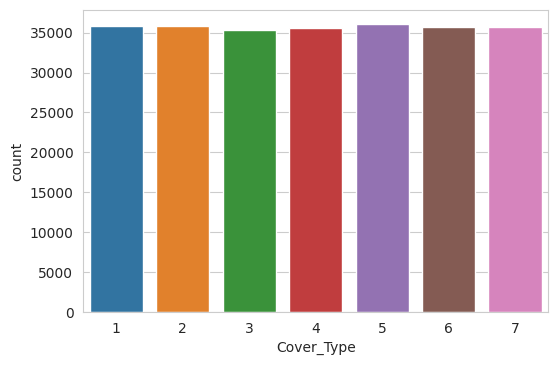

In [94]:
sns.countplot(df.Cover_Type);

We can also see the number of each cover_type via countplot graphic with values.

0 35836
1 35780
2 35391
3 35529
4 36079
5 35695
6 35690


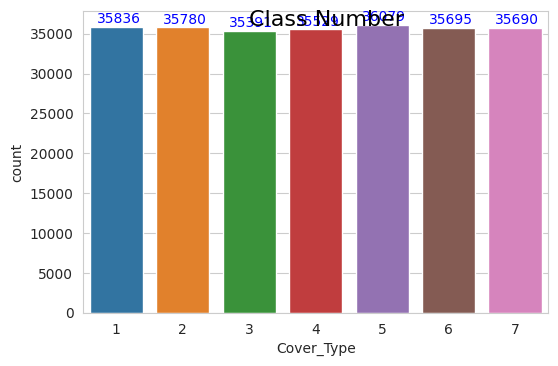

In [95]:
sns.countplot(df.Cover_Type);
for i,val in enumerate(df["Cover_Type"].value_counts().sort_index().to_list()):
    plt.text(i-.3,val+500,str(val),color="blue")
    print(i,val)
plt.text(2,36000,"Class Number",fontdict={"color":"Black","fontsize":16});

We can also see the percentage of each cover_type acording to the indexes.

In [96]:
df.Cover_Type.value_counts(1).sort_index()

1   0.1433440000
2   0.1431200000
3   0.1415640000
4   0.1421160000
5   0.1443160000
6   0.1427800000
7   0.1427600000
Name: Cover_Type, dtype: float64

We can see the general statistical information(mean, std and starting of the outlier level etc.) about the continious columns acording to the label categories.

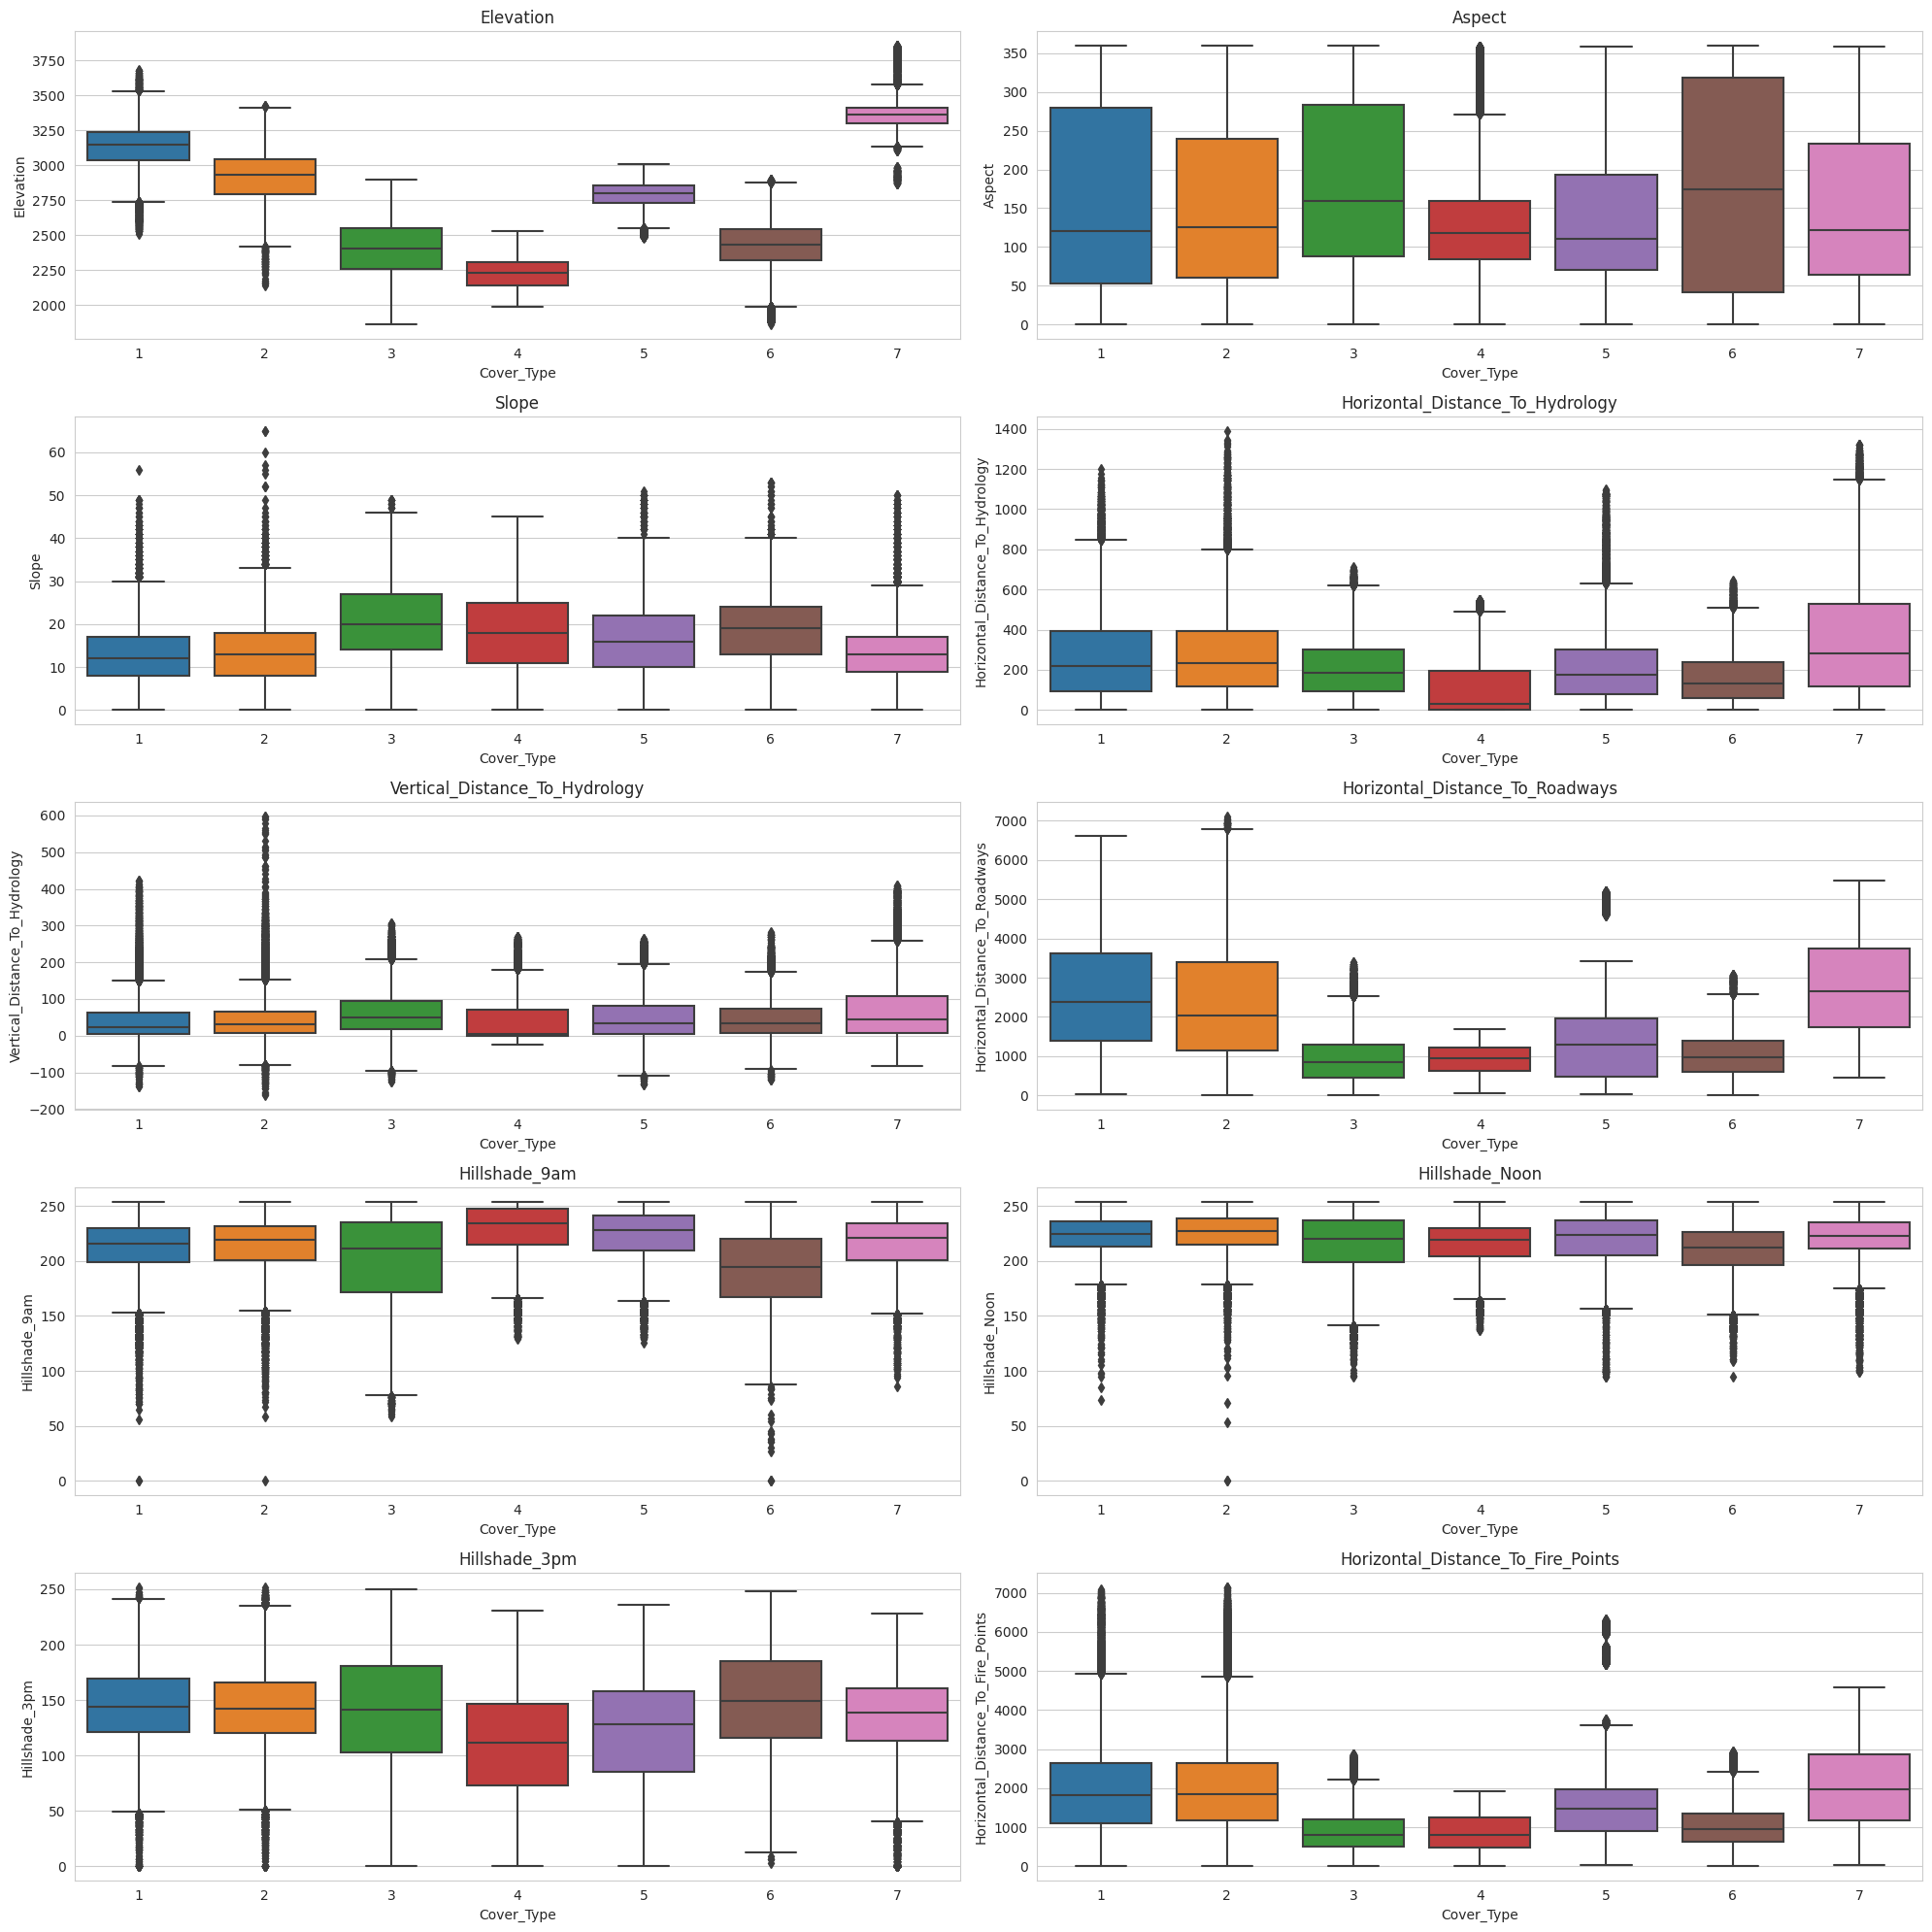

In [97]:
plt.figure(figsize=(20,20))
for i,col in enumerate(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'],1):
    plt.subplot(5,2,i)
    # print("-----------",i,"--",col,"---------------")
    plt.title(col)
    sns.boxplot(y=df[col], x=df["Cover_Type"])
    plt.tight_layout()
    

We can also see the distrubition of the label's categories by using pie chart.

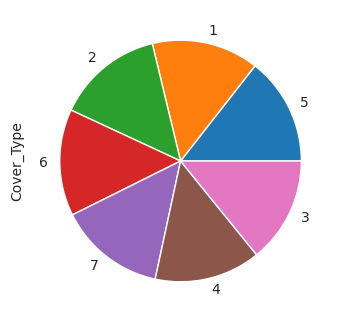

In [98]:
df.Cover_Type.value_counts().plot.pie()

We can see correlation matrix between all the cathegorical columns.

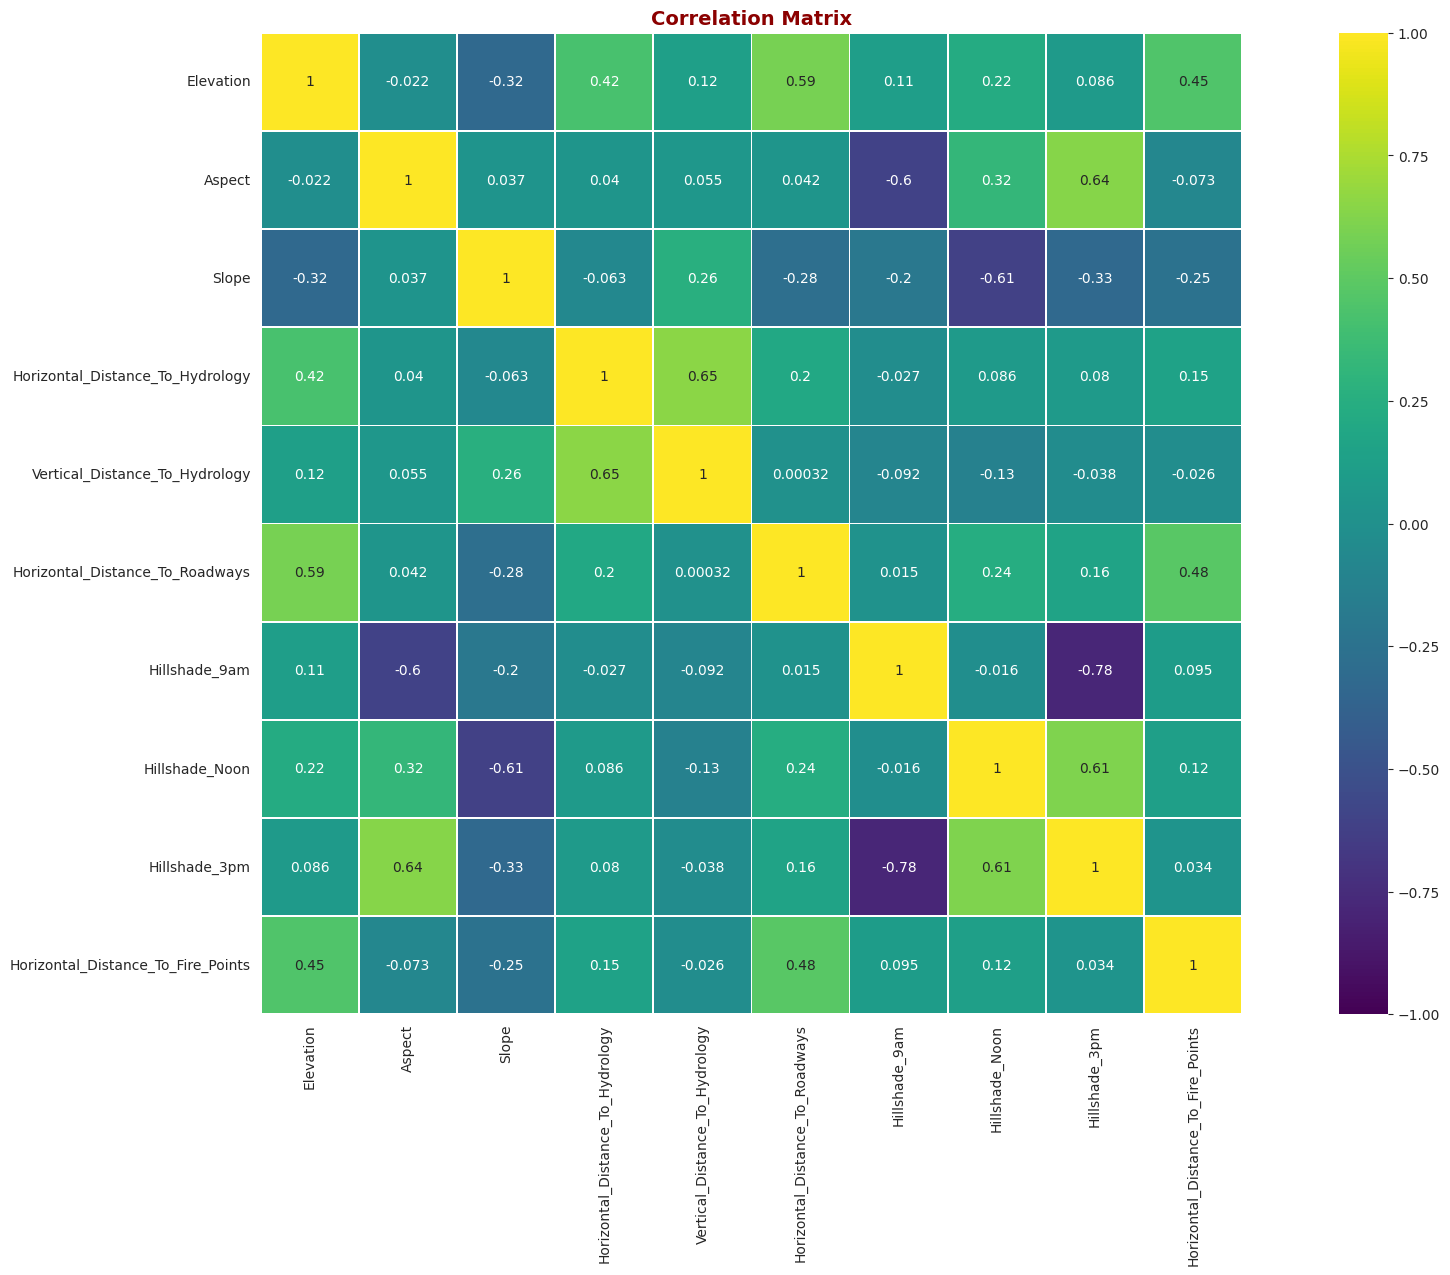

In [99]:
corr_matrix = df[df.columns[:10]].corr()

font_title = {'family': 'times new roman',
              'color': 'darkred',
              'weight': 'bold',
              'size': 14}

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

According to the correlation matrix, we can say that there is no multicolonority between the categorical columns. Or we get the same result by using function to see the multicolonority if the the value > 0.90 colored with red. As we see in the table, there is no value colored with red.

In [100]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [101]:
pd.DataFrame(df).corr().style.applymap(color_red)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
Elevation,1.000000,-0.021623,-0.320425,0.418355,0.123074,0.588262,0.110197,0.223934,0.085570,0.447299,0.333475,0.258671,0.351534,-0.782510,-0.191842,-0.128626,-0.292311,-0.100065,-0.132782,-0.174492,0.003057,0.003694,-0.010348,-0.336463,-0.033339,0.021009,0.039415,-0.103610,-0.003201,-0.045979,-0.156714,-0.031269,0.035729,0.005714,0.021407,0.142141,0.158268,0.085748,0.018309,0.017489,0.033065,-0.001136,0.169895,0.047714,0.090056,0.170538,0.122453,0.028749,0.119437,0.032229,0.066455,0.314775,0.289859,0.289498,0.014087
Aspect,-0.021623,1.000000,0.037395,0.039839,0.054886,0.042044,-0.603792,0.321651,0.639158,-0.072858,-0.147731,0.028987,0.048169,0.073776,-0.016750,-0.020253,-0.067986,0.013925,0.010701,-0.004899,-0.004235,-0.002316,-0.015688,0.129014,-0.033438,-0.041402,0.034077,0.005008,-0.002594,0.031048,0.035481,-0.035363,0.008149,-0.020511,0.023437,0.009952,0.028387,0.005457,-0.001869,-0.001383,0.011587,0.018233,-0.065518,-0.088555,0.000575,0.022884,0.020832,0.013902,-0.016936,0.002288,-0.041479,0.046740,-0.045001,0.007843,0.005389
Slope,-0.320425,0.037395,1.000000,-0.063237,0.263713,-0.279899,-0.198674,-0.611509,-0.326459,-0.246624,-0.159234,-0.071221,-0.111397,0.295296,0.107126,-0.090806,0.280508,0.093580,0.087684,-0.045037,-0.011174,-0.014371,-0.021072,0.260898,-0.103869,-0.117455,0.127440,-0.040771,0.000642,-0.046645,-0.113119,-0.065022,-0.053430,-0.066462,-0.022460,-0.067986,-0.181630,0.017112,0.009625,-0.035513,0.015305,0.027344,-0.099074,0.119295,-0.065273,-0.148989,0.077069,-0.025016,-0.046046,-0.004225,0.001406,-0.155871,0.053949,-0.042948,0.075304
Horizontal_Distance_To_Hydrology,0.418355,0.039839,-0.063237,1.000000,0.649110,0.198532,-0.026739,0.085746,0.079973,0.150115,-0.008892,0.088870,0.201344,-0.239054,-0.066549,0.029486,-0.079891,-0.038646,-0.009084,0.023387,0.005180,0.000978,-0.007122,-0.098496,0.028312,0.031956,0.021812,-0.084196,-0.001890,-0.064492,-0.131183,-0.015425,-0.023353,-0.053487,-0.021596,-0.006398,-0.079524,0.041234,0.011567,0.036092,0.054868,0.012432,0.024407,-0.026570,0.060491,0.121505,0.060243,0.071237,-0.005432,0.071577,-0.012239,0.137613,0.074995,0.242607,0.009305
Vertical_Distance_To_Hydrology,0.123074,0.054886,0.263713,0.649110,1.000000,0.000320,-0.092033,-0.132788,-0.038035,-0.026351,-0.118925,0.006508,0.074849,0.029322,-0.017746,-0.001614,0.081016,0.003972,0.030533,0.091070,-0.005193,-0.007702,-0.016778,0.026586,-0.030015,-0.033452,0.087370,-0.065371,-0.001669,-0.054455,-0.132640,-0.038180,-0.038609,-0.060668,-0.018284,-0.058009,-0.139585,0.020635,-0.005416,-0.010505,0.050943,0.026211,-0.064368,0.002705,0.006642,0.016684,0.079244,0.031426,-0.013443,0.010658,-0.020483,-0.015265,0.061356,0.223416,0.082886
Horizontal_Distance_To_Roadways,0.588262,0.042044,-0.279899,0.198532,0.000320,1.000000,0.014715,0.240571,0.160647,0.481598,0.381750,-0.081962,0.120629,-0.447409,-0.109886,-0.082542,-0.154573,-0.087779,-0.085479,-0.131317,0.017106,0.021196,-0.018226,-0.209932,-0.062459,0.096227,0.004398,-0.058601,-0.002299,-0.005040,-0.059798,-0.040476,0.059121,0.041193,-0.000853,0.106936,0.128844,0.018875,-0.014259,0.029251,0.023538,-0.011084,0.271913,-0.056628,0.026135,0.030996,0.036506,0.029809,0.057931,0.024802,0.056740,0.20008

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [102]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

we can see the results and we can check that how many outliers are there each of continious features and the columns which have continuous value should be examined in terms of outliers to see numerical results by using 3 scrips below. 

In [103]:
lst = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [104]:
def outlier_report(df, cols, whisker=1.5):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T
res = outlier_report(df, lst)

In [105]:
res

,lower_limit,upper_limit,iqr,# of outliers
Slope,-8.0000000000,40.0000000000,12.0000000000,850.0000000000
Horizontal_Distance_To_Hydrology,-330.0000000000,726.0000000000,264.0000000000,"8,113.0000000000"
Vertical_Distance_To_Hydrology,-106.0000000000,190.0000000000,74.0000000000,"9,203.0000000000"
Horizontal_Distance_To_Roadways,"-1,551.0000000000","4,601.0000000000","1,538.0000000000","12,793.0000000000"
Hillshade_9am,135.0000000000,295.0000000000,40.0000000000,"5,637.0000000000"
Hillshade_Noon,162.5000000000,278.5000000000,29.0000000000,"5,911.0000000000"
Hillshade_3pm,14.5000000000,258.5000000000,61.0000000000,"2,195.0000000000"
Horizontal_Distance_To_Fire_Points,"-1,162.0000000000","3,894.0000000000","1,264.0000000000","10,556.0000000000"


We can see the lower_limit and upper_limit of each column like the code's result below.

In [106]:
df1=df.copy()
for col in res.index:
    print(res.loc[col]["lower_limit"], res.loc[col]["upper_limit"])
    df1=df1[(df1[col] >= res.loc[col]["lower_limit"]) & (df1[col] <= res.loc[col]["upper_limit"])]
    

-8.0 40.0
-330.0 726.0
-106.0 190.0
-1551.0 4601.0
135.0 295.0
162.5 278.5
14.5 258.5
-1162.0 3894.0


In [107]:
df1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
5,2855,162,5,85,4,2899,224,241,151,2568,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249993,2714,127,11,0,0,1444,238,232,122,1378,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
249994,2611,111,14,345,66,1561,243,223,106,1789,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


We can see the slope's lower_limit by the script below.

In [108]:
res.loc["Slope"]["lower_limit"]


-8.0

We can see the shape of dataset for the initial and shape of the data between ıqr.

In [109]:
df.shape, df1.shape, df.shape[0]- df1.shape[0]

((250000, 55), (205117, 55), 44883)

we can see the results by visualizing the script below.

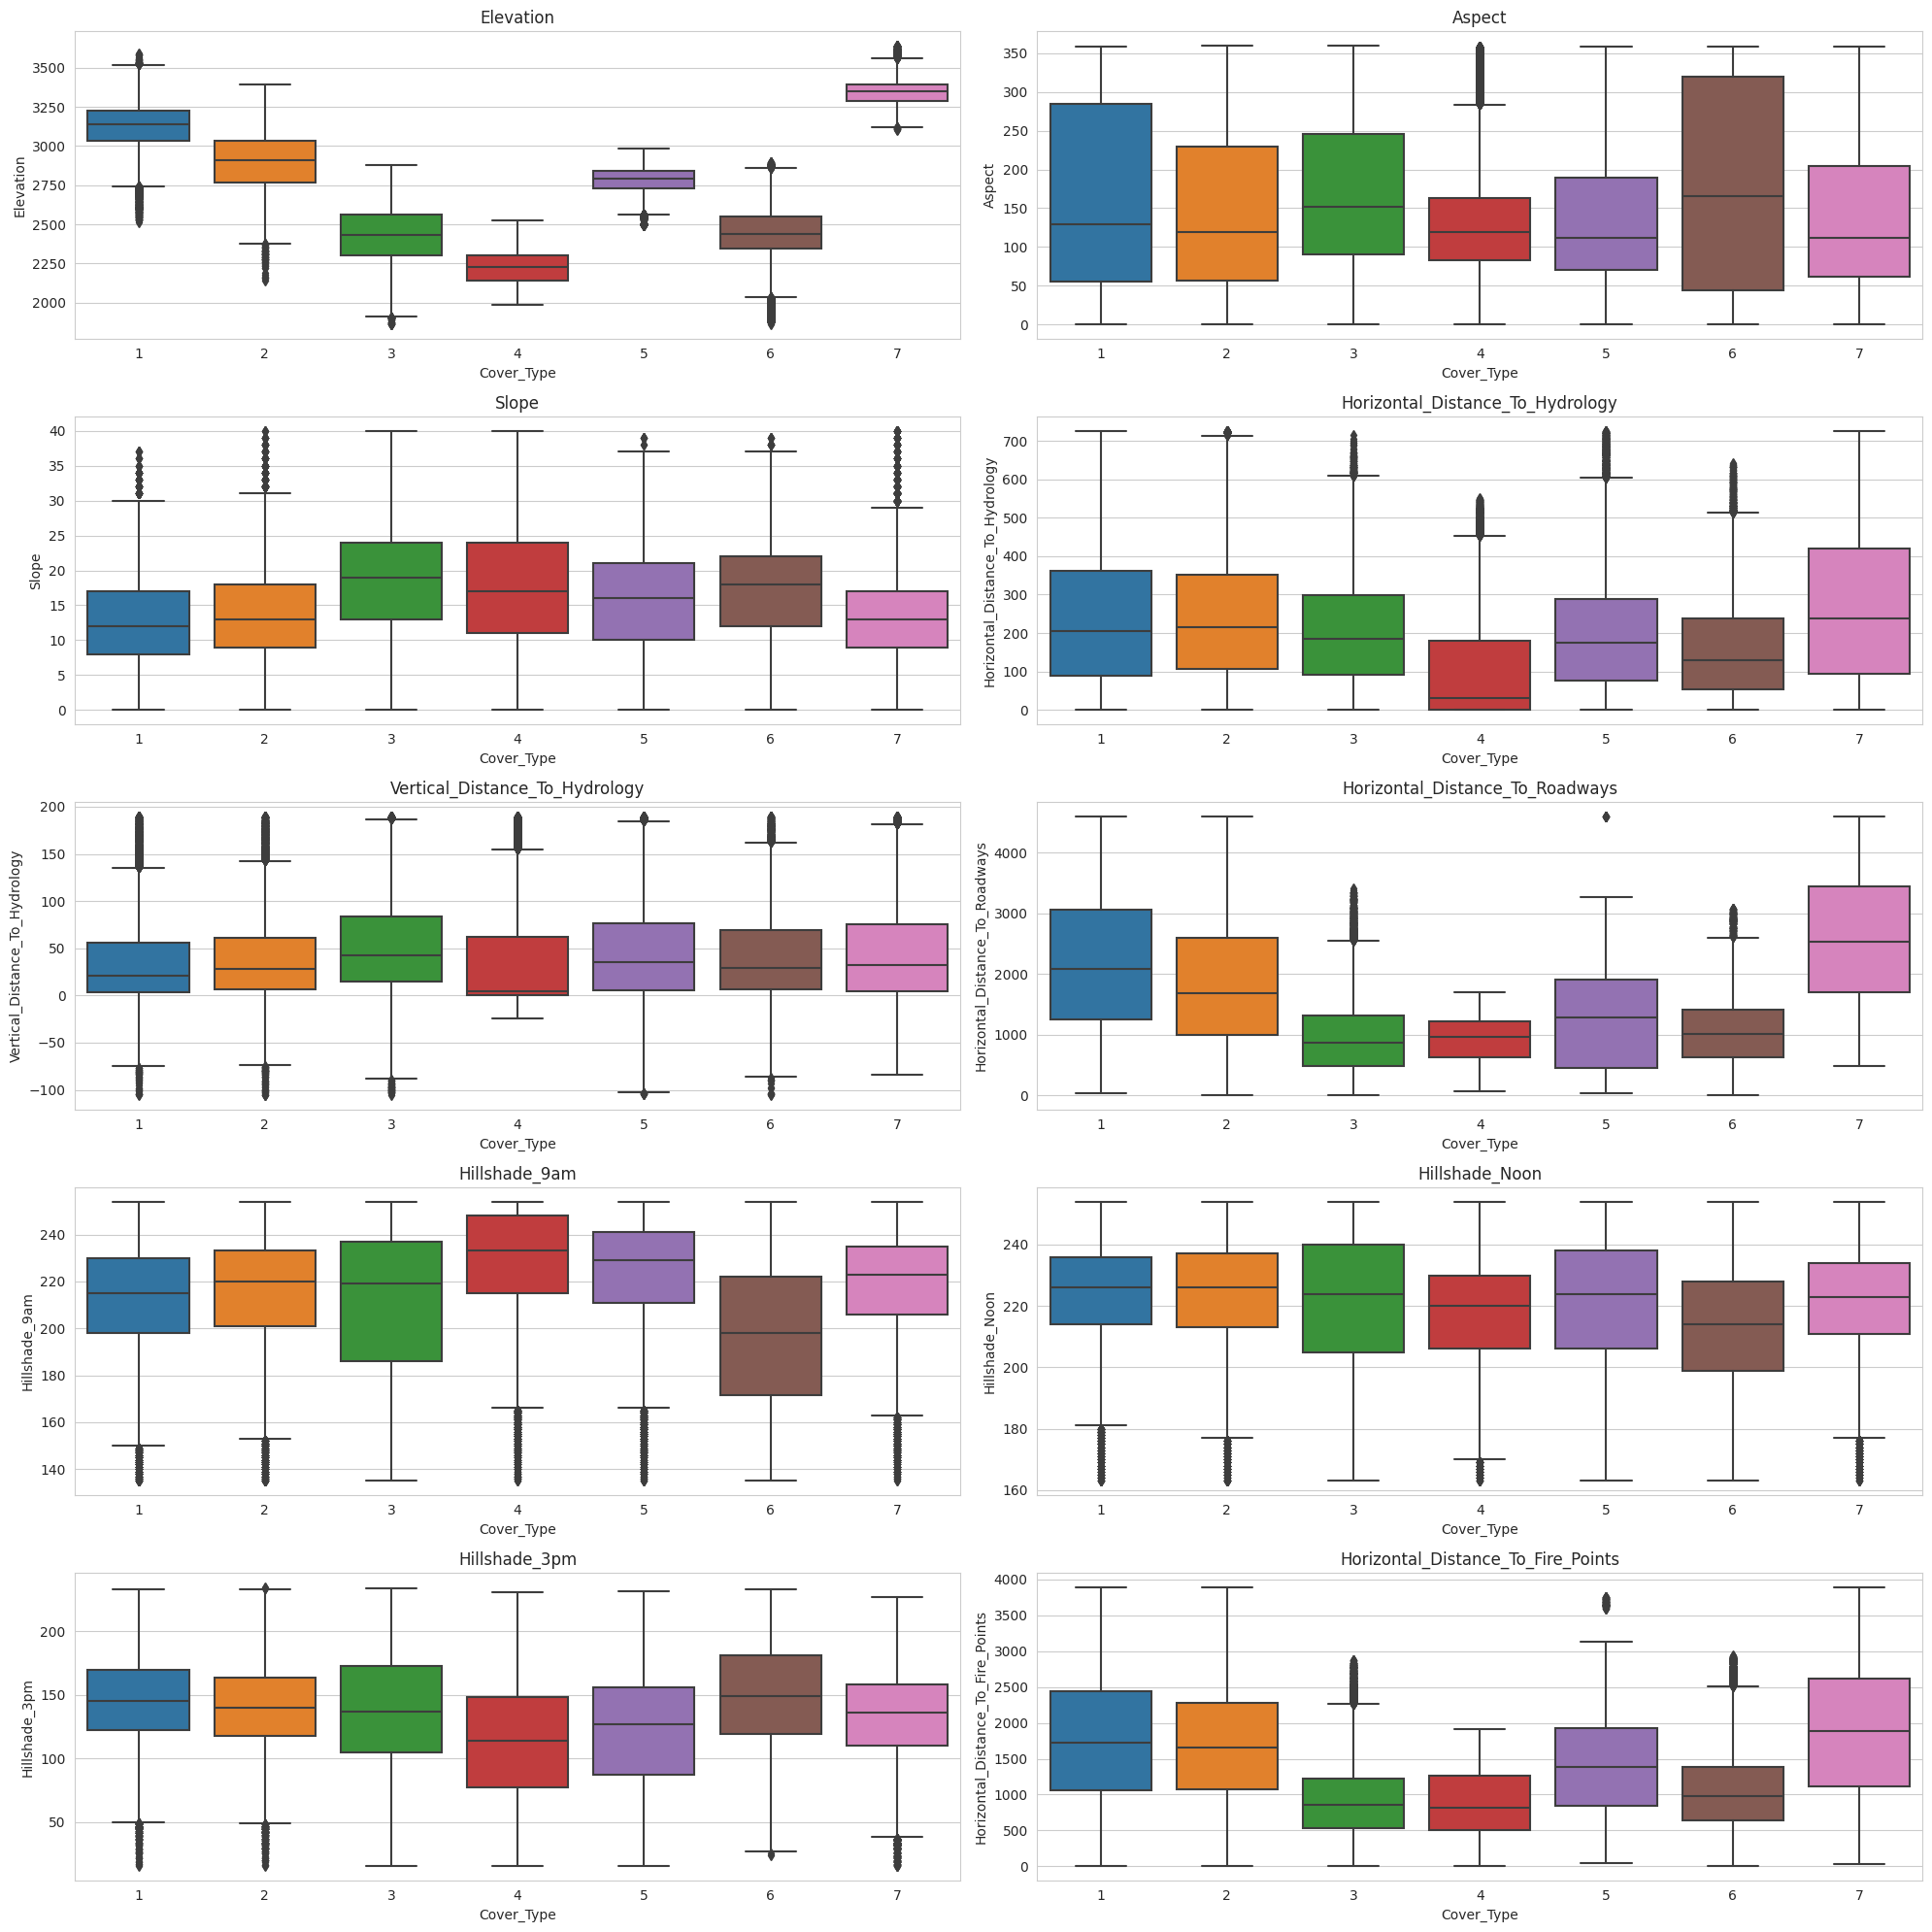

In [110]:
plt.figure(figsize=(20,20))
for i,col in enumerate(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'],1):
    plt.subplot(5,2,i)
    plt.title(col)
    sns.boxplot(y=df1[col], x=df["Cover_Type"])
    plt.tight_layout()

Or we can see the same result dealing with the columns one by one.

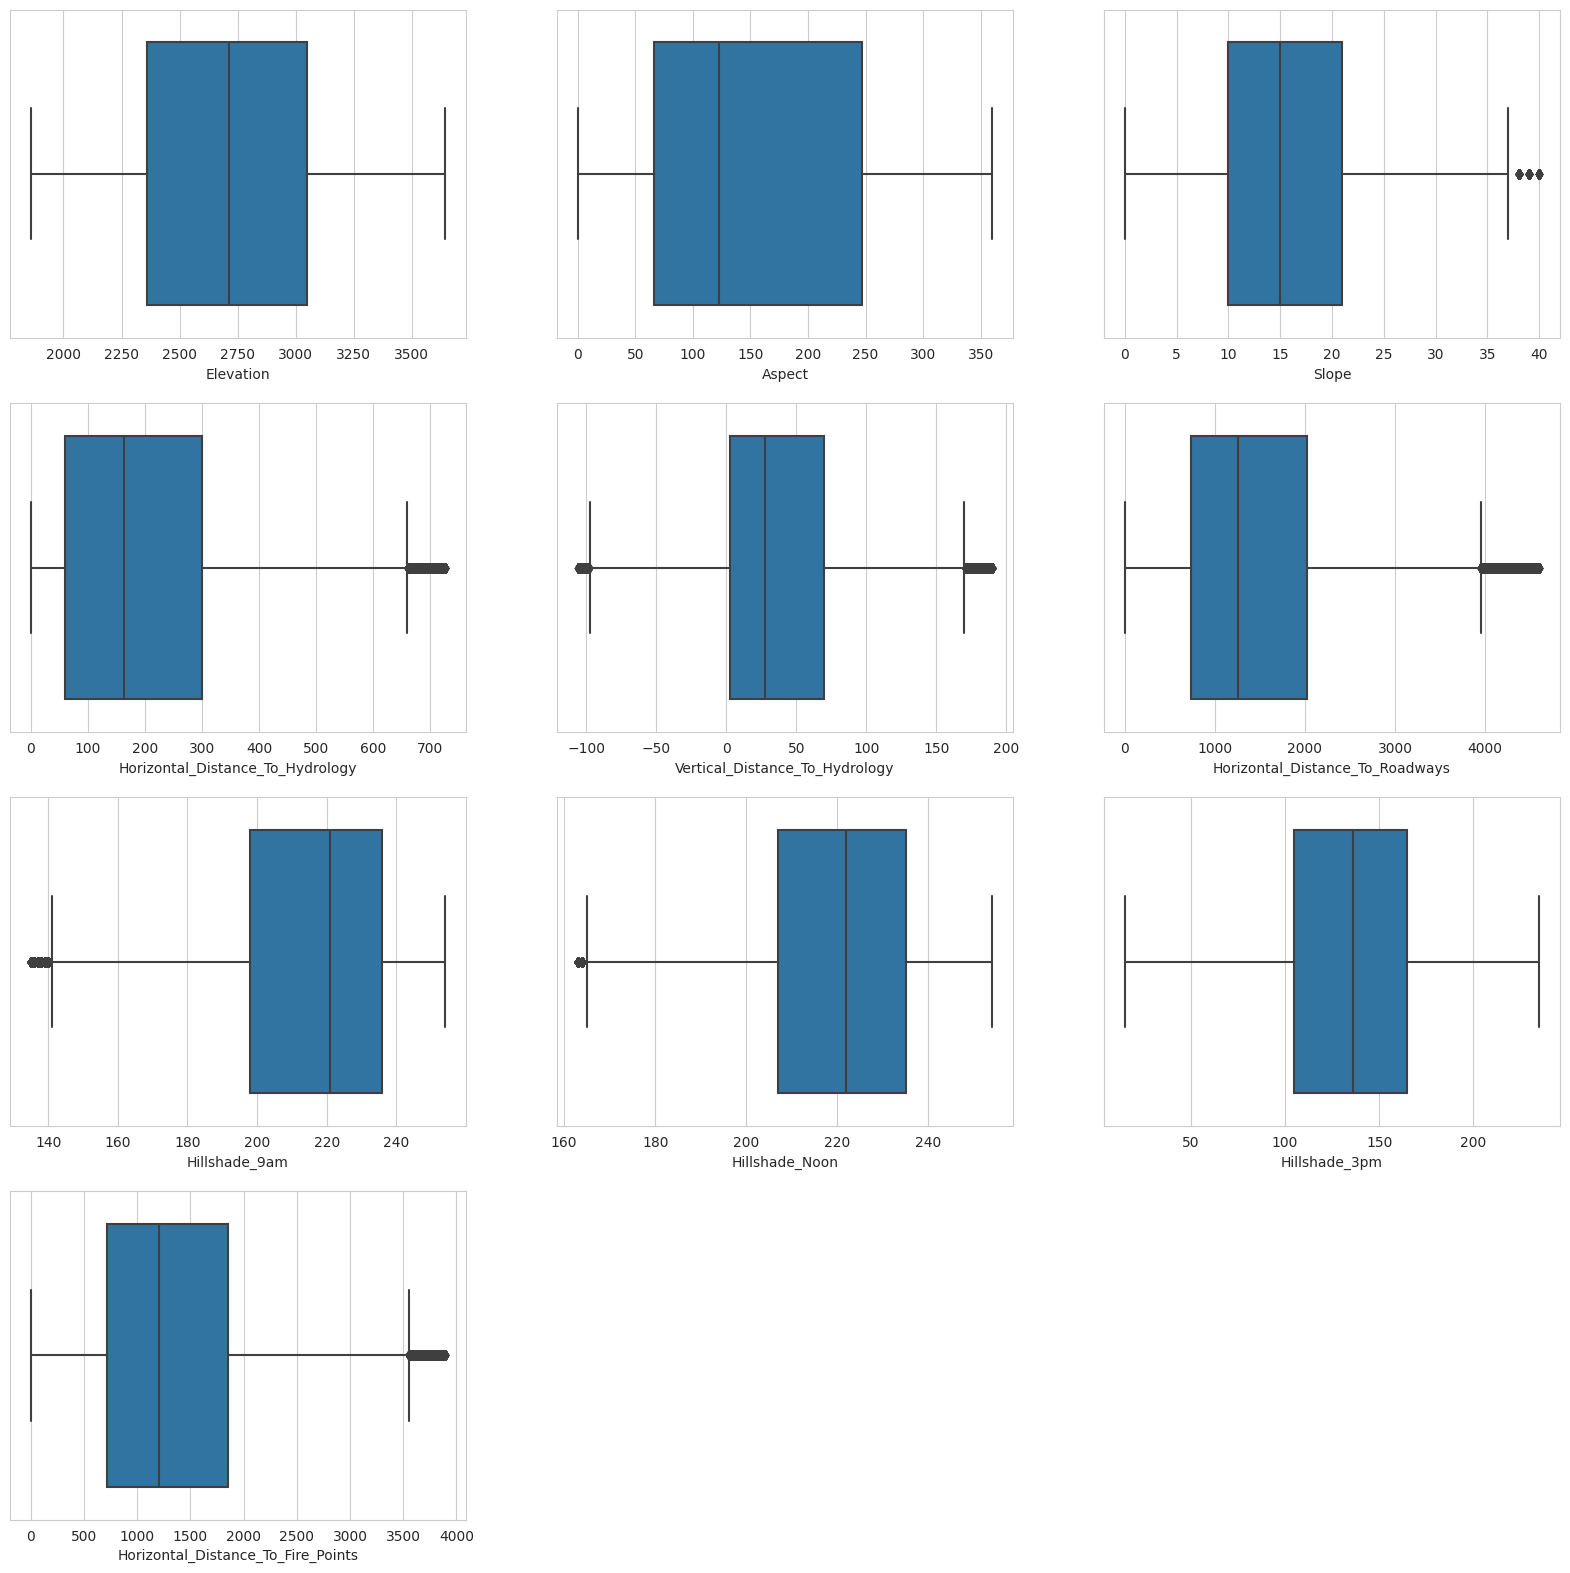

In [111]:
index = 0
plt.figure(figsize=(20,20))
for i in df1.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=i, data=df1, whis=1.5)

In [112]:
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

In [113]:
'''This function detects the best z-score for outlier detection in the specified column.'''

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.05, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
    
    df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(lambda x : x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), colors="r", ls = ":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                          IQR_coef,
                                                                          outlier_limit,
                                                                          num_outlier,     
                                                                          (np.round(percentile_threshold, 3), 
                                                                           np.round(100-percentile_threshold, 3))),
                                                                          (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

In [114]:
'''This function plots histogram, boxplot and z-score/outlier graphs for the specified column.'''

def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

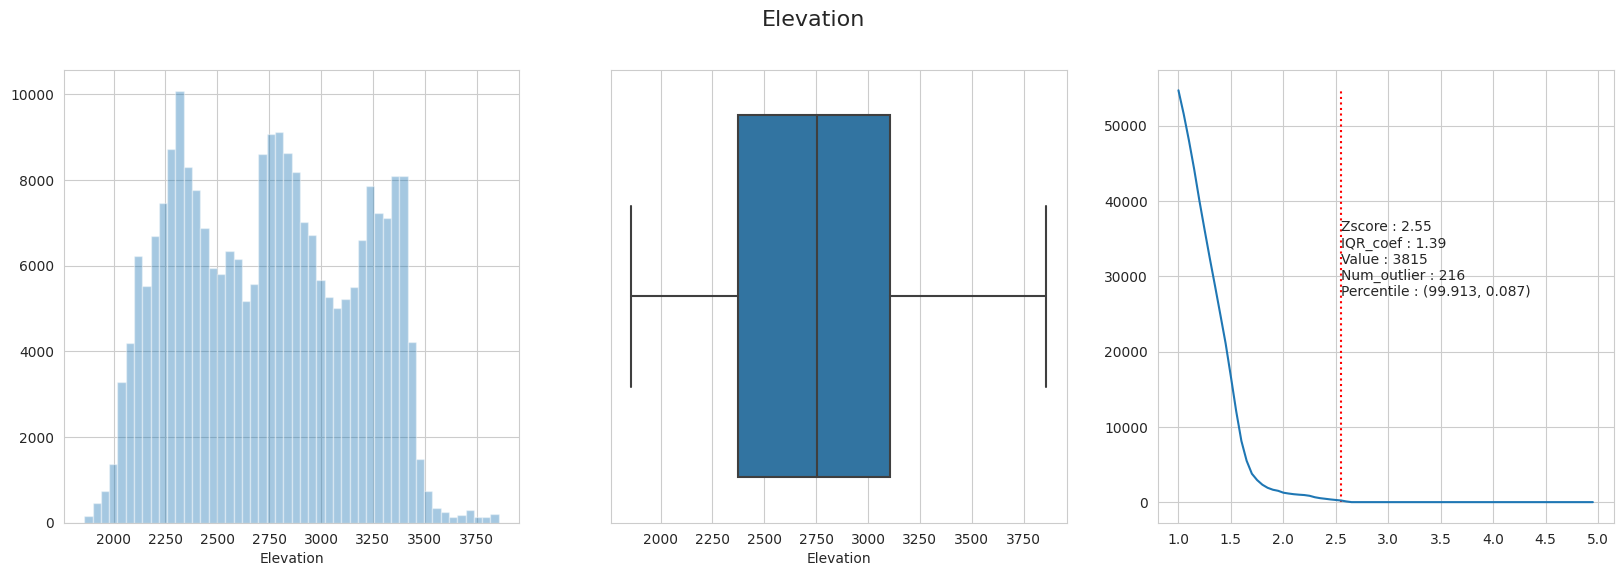

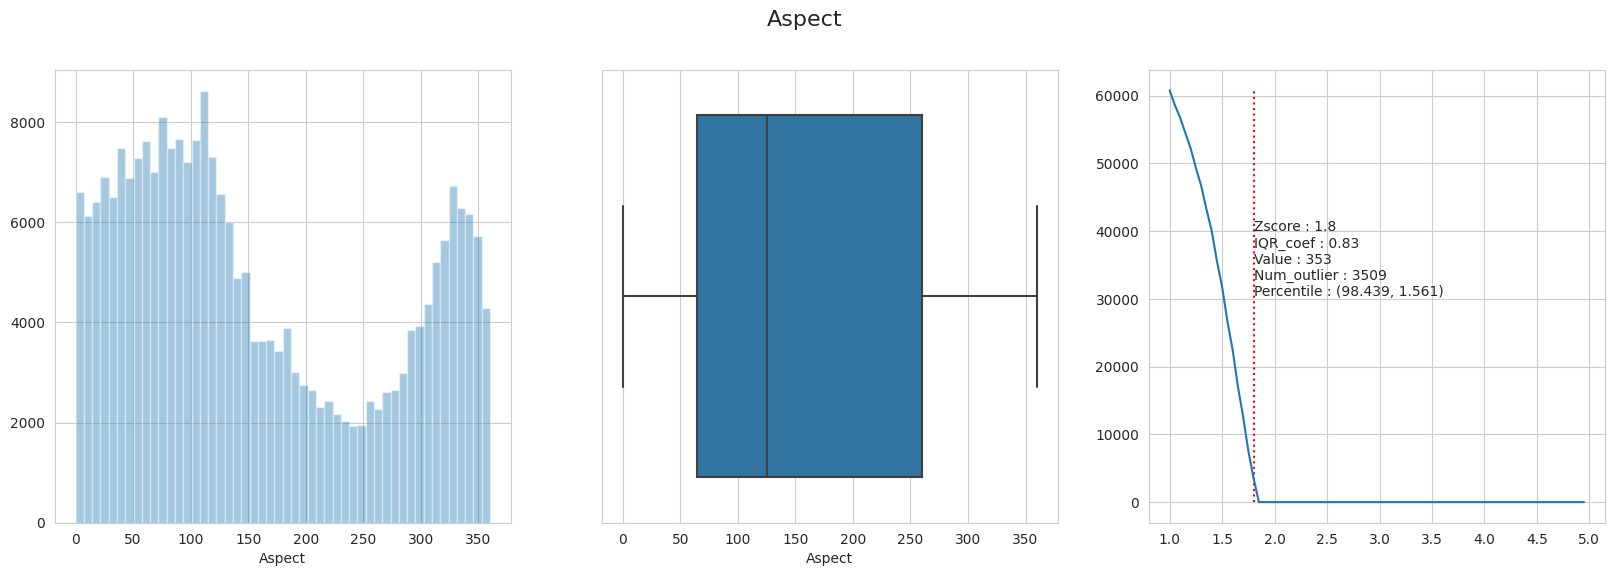

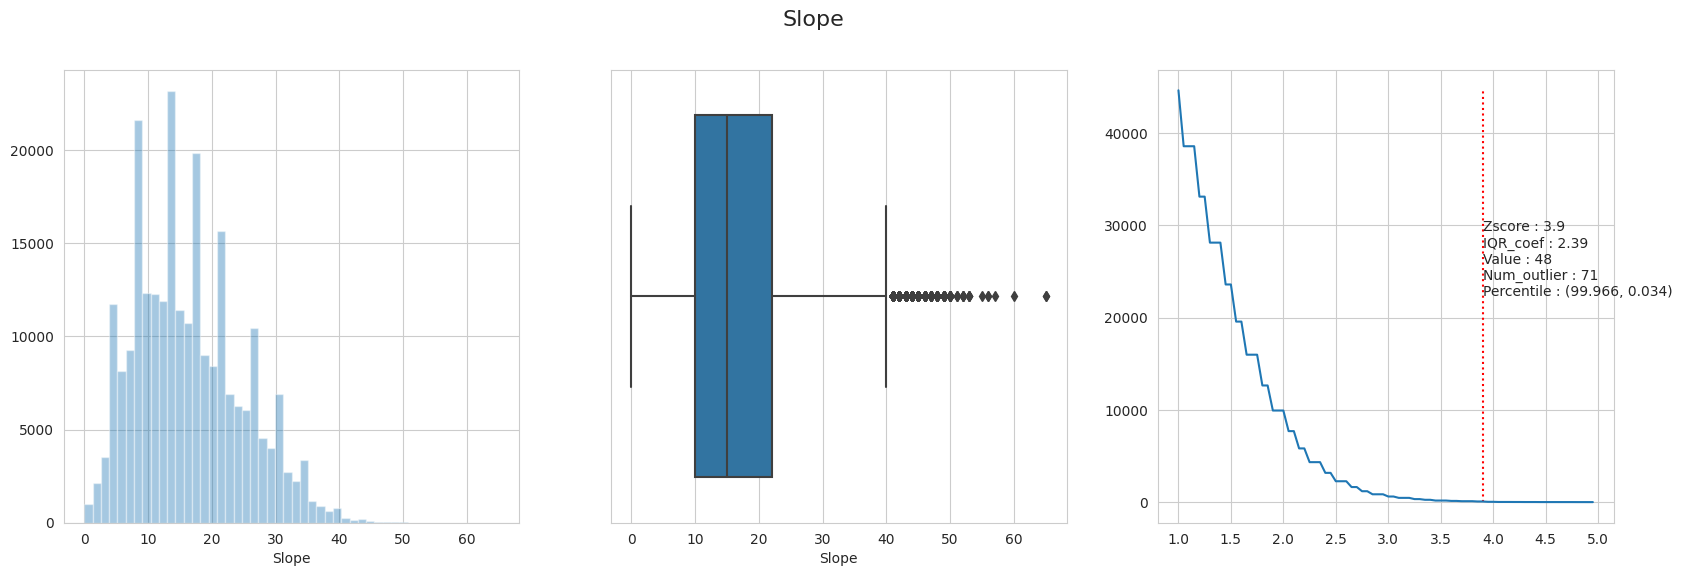

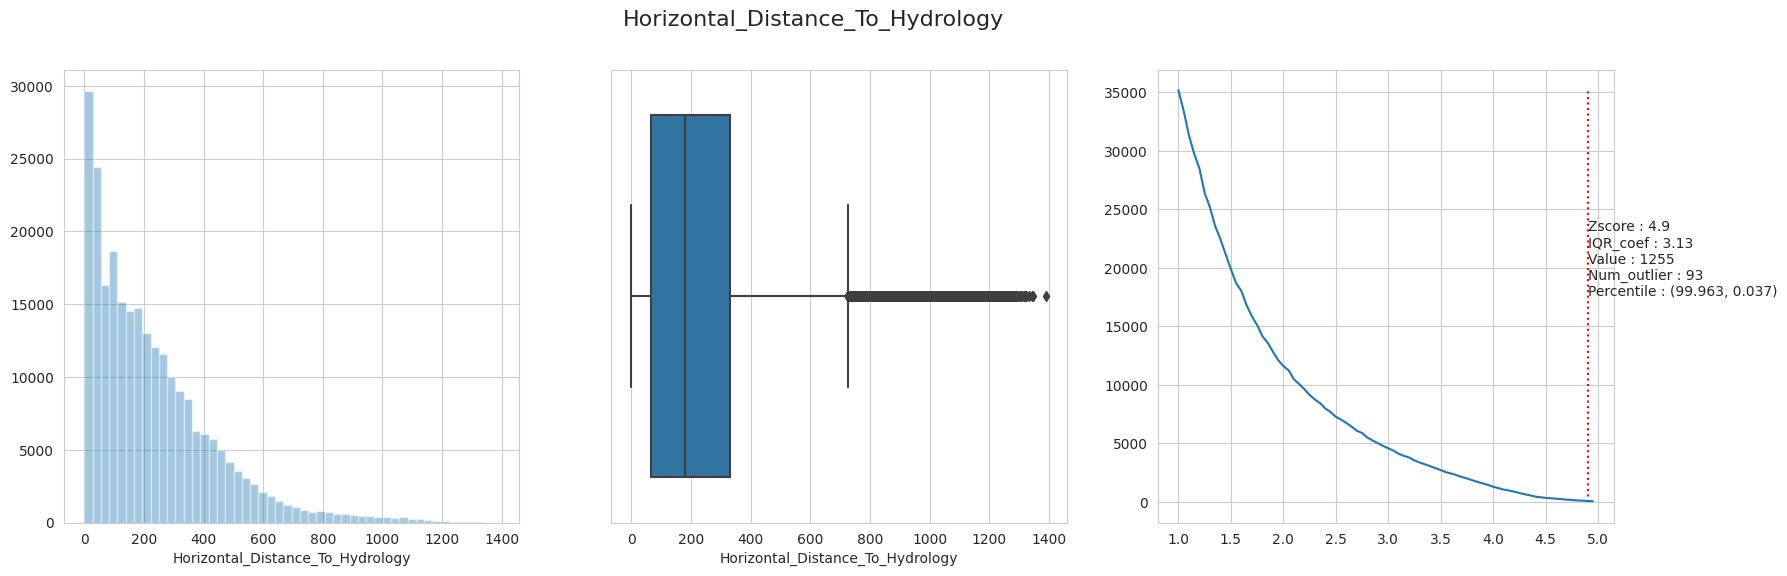

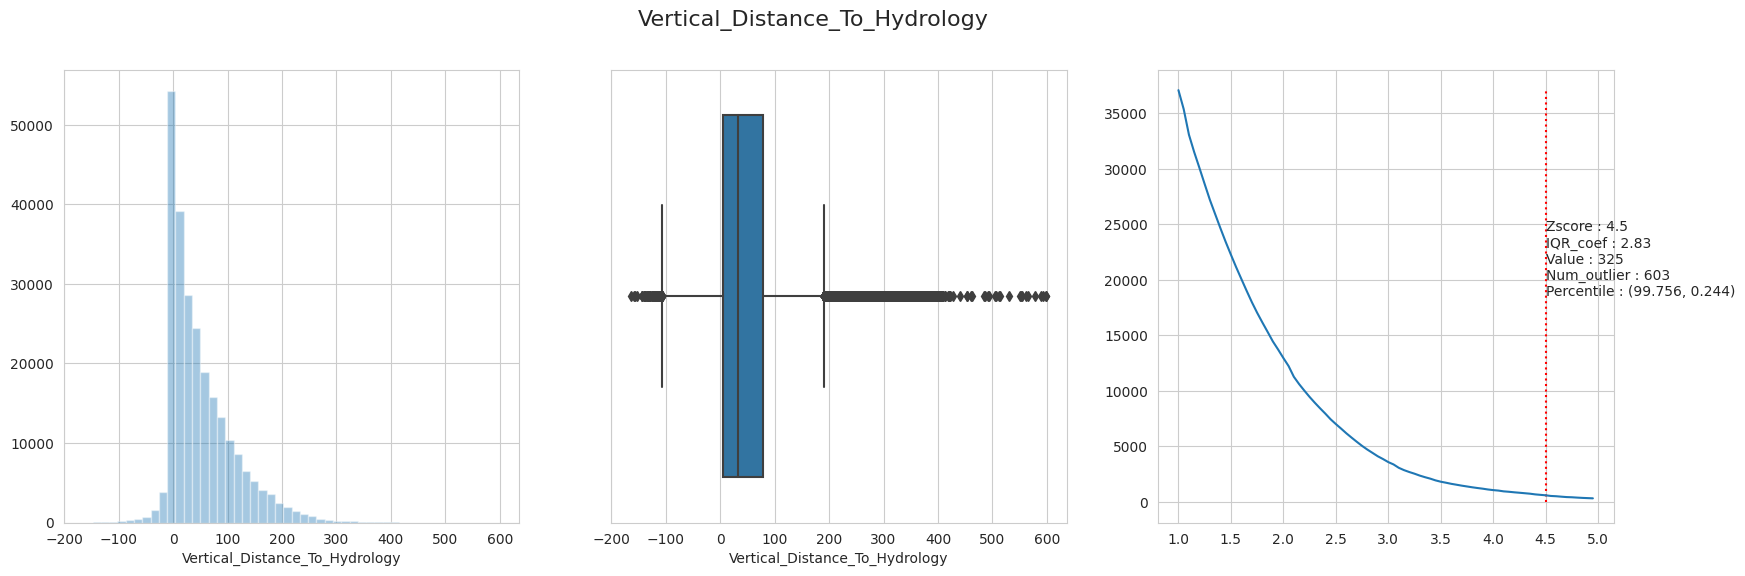

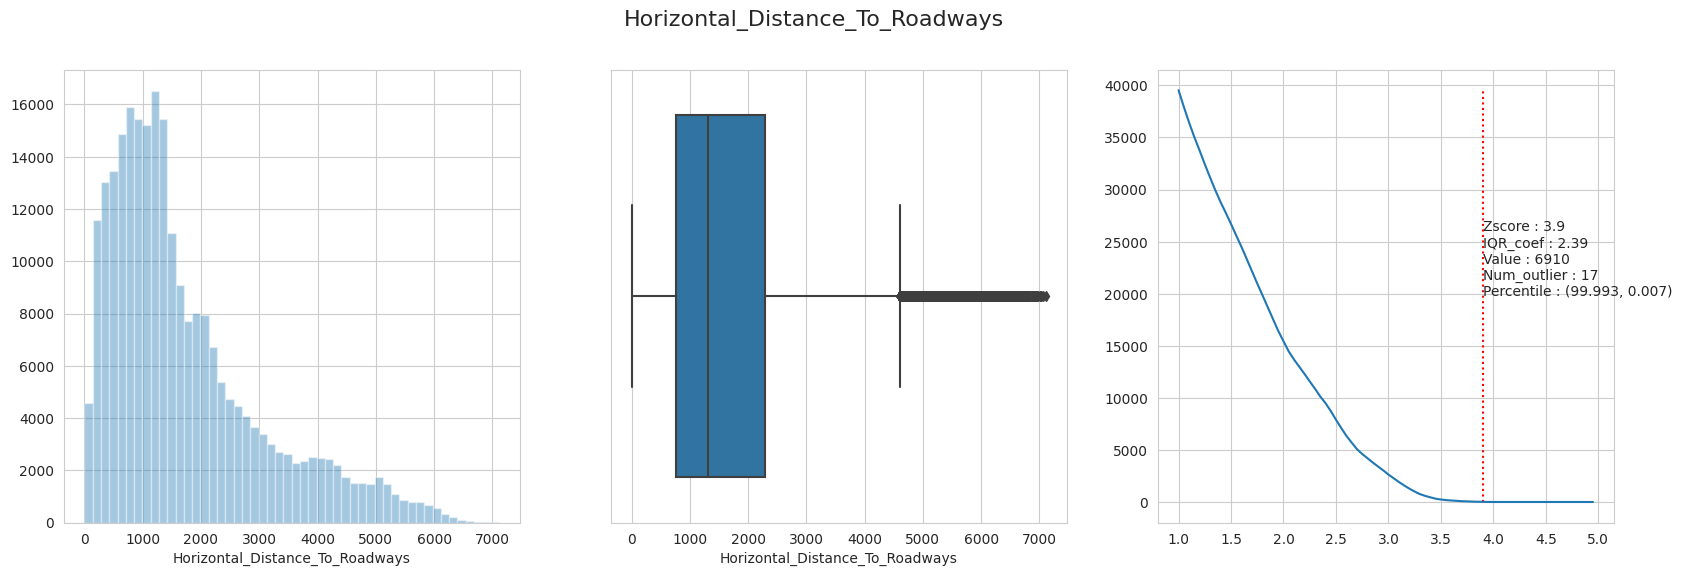

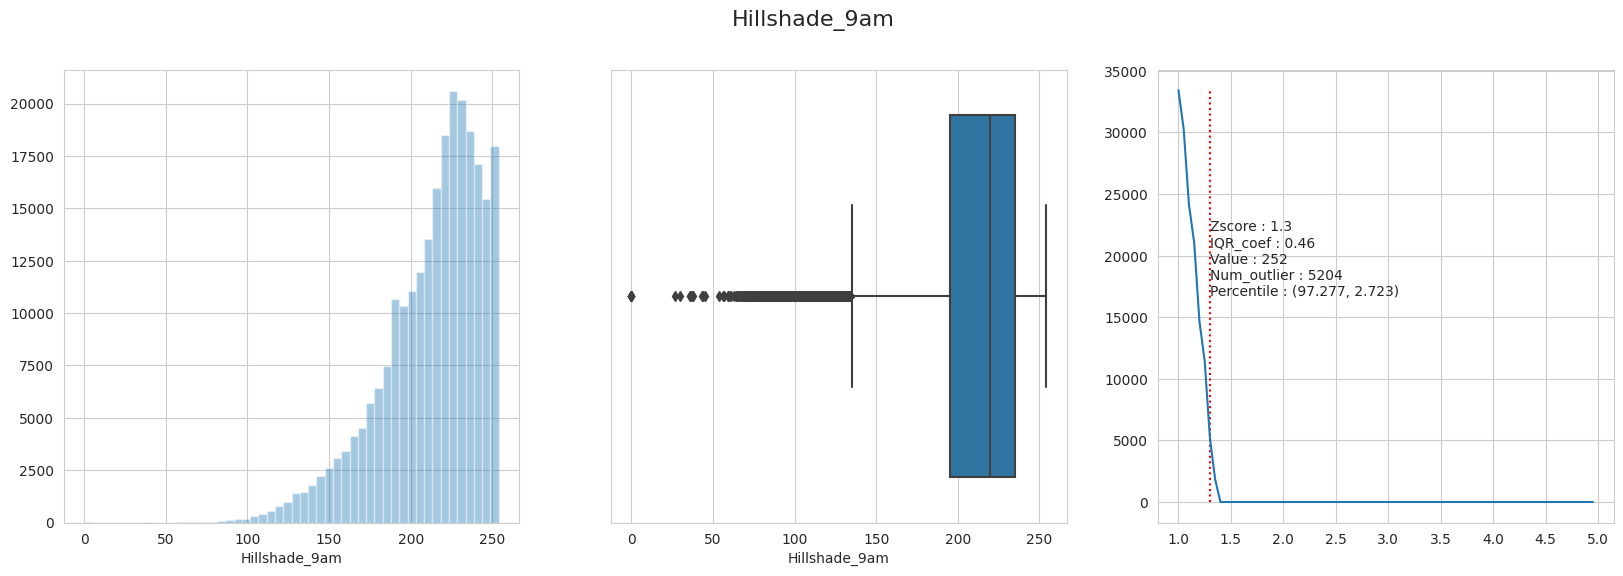

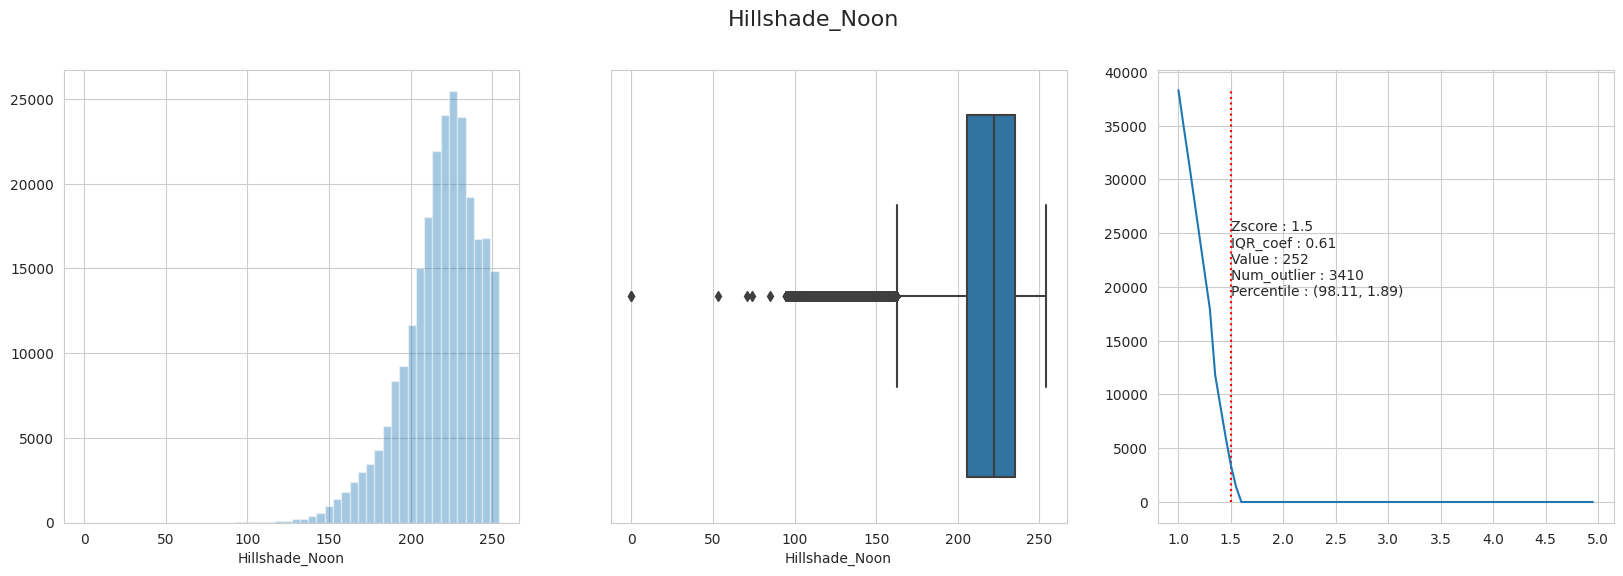

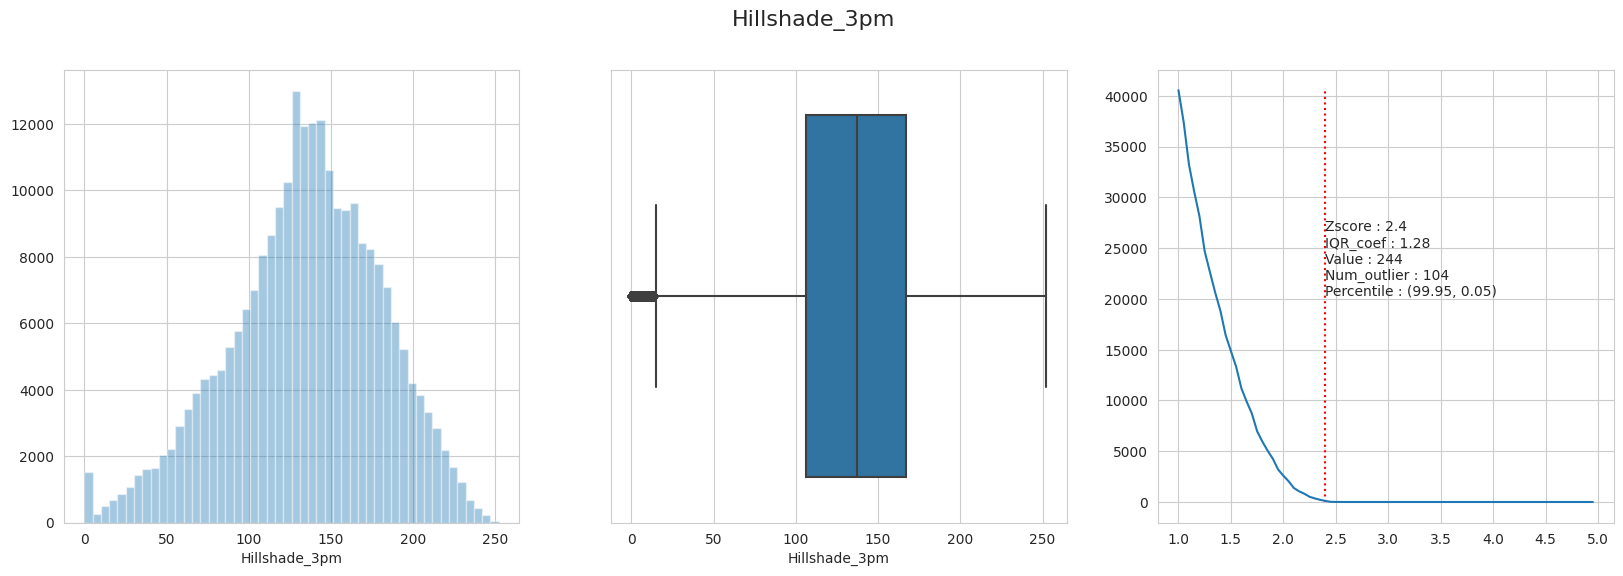

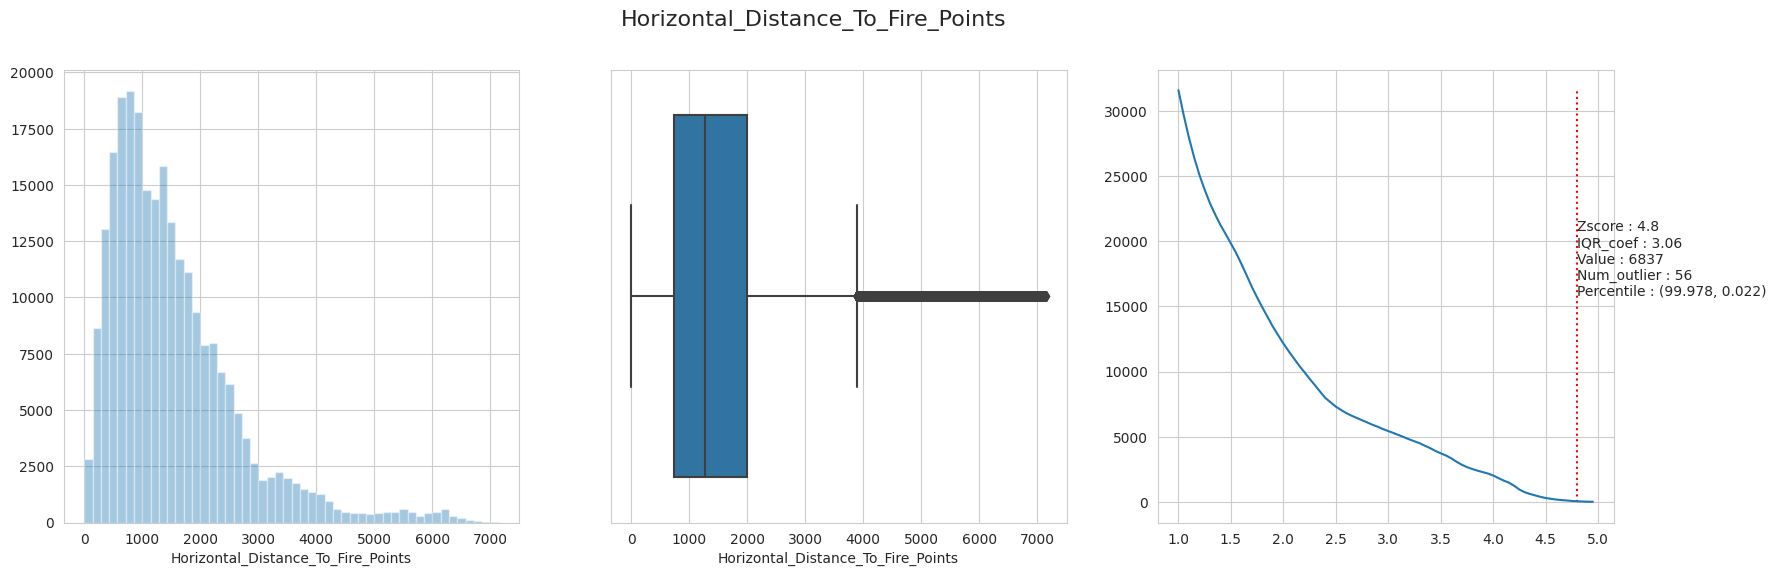

In [115]:
for col in df.columns[:10]:
    outlier_inspect(df, col)

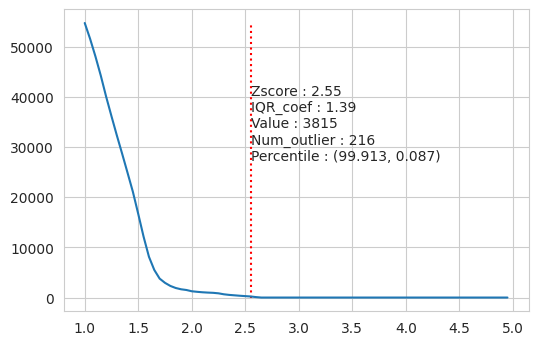

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>,
       threshold  outlier_count           pct
 0  1.0000000000          54703  5.7419154343
 1  1.0500000000          51562  6.8189752143
 2  1.1000000000          48046  7.9611205928
 3  1.1500000000          44221  9.4773976165
 4  1.2000000000          40030  9.7601798651
 5  1.2500000000          36123 10.5639066523
 6  1.3000000000          32307 11.3969108862
 7  1.3500000000          28625 13.1388646288
 8  1.4000000000          24864 15.2911840412
 9  1.4500000000          21062 20.9144430728
 10 1.5000000000          16657 27.2438014048
 11 1.5500000000          12119 32.9235085403
 12 1.6000000000           8129 32.4025095338
 13 1.6500000000           5495 31.3375796178
 14 1.7000000000           3773 22.3694672674
 15 1.7500000000           2929 20.9969272789
 16 1.8000000000           2314 17.7182368194
 17 1.8500000000           1904 13.4453781513
 18 1.9000000000           1

In [116]:
outlier_zscore(df, "Elevation")

### Deal with Outliers

#### *ii. Drop Outliers*

In [117]:
df2 = df1.copy()

In [118]:
"""This function gives max/min threshold, number of data, number of outlier and plots its boxplot,
according to the tree type and the entered z-score value for the relevant column."""

def num_outliers(df2, col, whis = 1.5):
    q1 = df2.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df2.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    print("Column_name :", col)
    print("whis :", whis)
    print("-------------------------------------------")
    for i in np.sort(df2.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        print("min_threshold:", min_threshold, "\nmax_threshold:", max_threshold)
        num_outliers = len(df2[df2["Cover_Type"]==i][col][(df[col]<min_threshold) | (df[col]>max_threshold)])
        print(f"Num_of_values for {i} :", len(df2[df2["Cover_Type"]==i]))
        print(f"Num_of_outliers for {i} :", num_outliers)
        print("-------------------------------------------")
    return sns.boxplot(y = df2[col], x = df2["Cover_Type"], whis=whis)

In [119]:
"""This function assigns the NaN-value first and then drop related rows, according to the tree type and the entered
whis value and plots the boxplot for the relevant column. """

def remove_outliers(df2, col, whis=1.5):
    q1 = df2.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df2.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df2.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df2.loc[((df2["Cover_Type"]==i) & ((df2[col]<min_threshold) | (df2[col]>max_threshold))), col] = np.nan
    return sns.boxplot(y = df2[col], x = df2["Cover_Type"], whis=whis)

Elevation

Column_name : Elevation
whis : 3
-------------------------------------------
min_threshold: 2449.0 
max_threshold: 3814.0
Num_of_values for 1 : 26637
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: 1987.0 
max_threshold: 3814.0
Num_of_values for 2 : 25797
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: 1513.0 
max_threshold: 3354.0
Num_of_values for 3 : 29592
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 1657.0 
max_threshold: 2784.0
Num_of_values for 4 : 33997
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 2398.0 
max_threshold: 3175.0
Num_of_values for 5 : 30868
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 1722.0 
max_threshold: 3171.0
Num_of_values for 6 : 31924
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: 2957.0 
max_threshold: 3727.0
Num_of_values for 7 

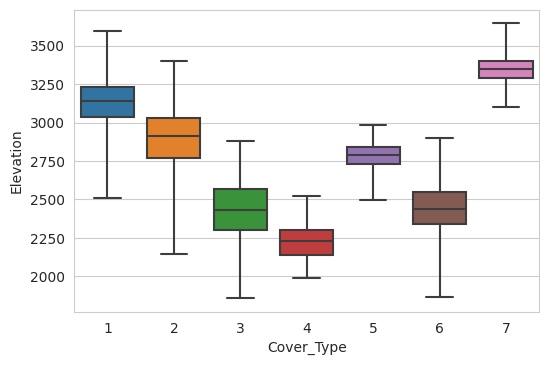

In [120]:
num_outliers(df2, "Elevation", whis=3)

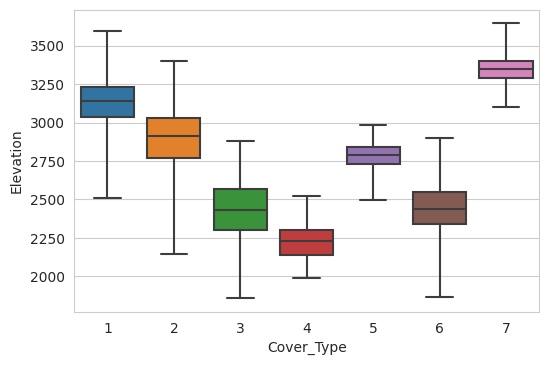

In [121]:
remove_outliers(df2, "Elevation", whis=3)

Aspect

Column_name : Aspect
whis : 3
-------------------------------------------
min_threshold: -635.0 
max_threshold: 975.0
Num_of_values for 1 : 26637
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -462.0 
max_threshold: 749.0
Num_of_values for 2 : 25797
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -374.0 
max_threshold: 711.0
Num_of_values for 3 : 29592
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -157.0 
max_threshold: 403.0
Num_of_values for 4 : 33997
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -283.0 
max_threshold: 543.0
Num_of_values for 5 : 30868
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -781.0 
max_threshold: 1144.0
Num_of_values for 6 : 31924
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -367.0 
max_threshold: 634.0
Num_of_values for 7 : 26302
N

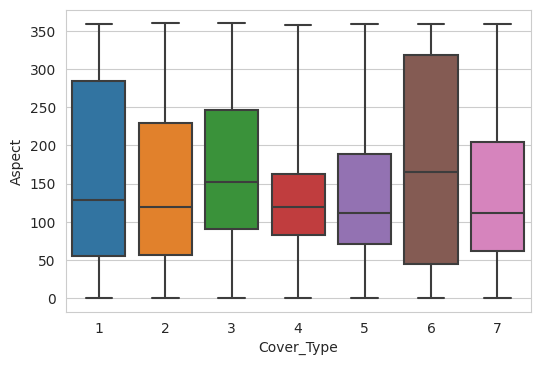

In [122]:
num_outliers(df2, "Aspect", whis=3)

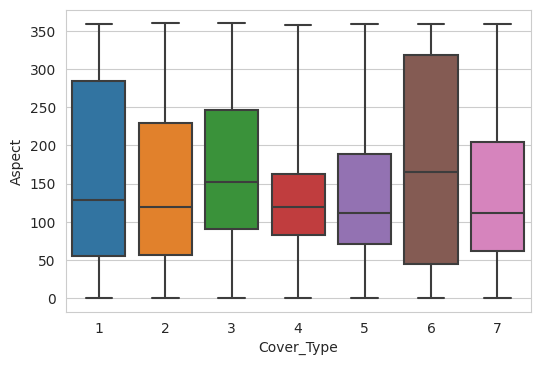

In [123]:
remove_outliers(df2, "Aspect", whis=3)

Slope

Column_name : Slope
whis : 3
-------------------------------------------
min_threshold: -19.0 
max_threshold: 44.0
Num_of_values for 1 : 26637
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -18.0 
max_threshold: 45.0
Num_of_values for 2 : 25797
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -20.0 
max_threshold: 57.0
Num_of_values for 3 : 29592
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -28.0 
max_threshold: 63.0
Num_of_values for 4 : 33997
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -23.0 
max_threshold: 54.0
Num_of_values for 5 : 30868
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -18.0 
max_threshold: 52.0
Num_of_values for 6 : 31924
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -15.0 
max_threshold: 41.0
Num_of_values for 7 : 26302
Num_of_outliers f

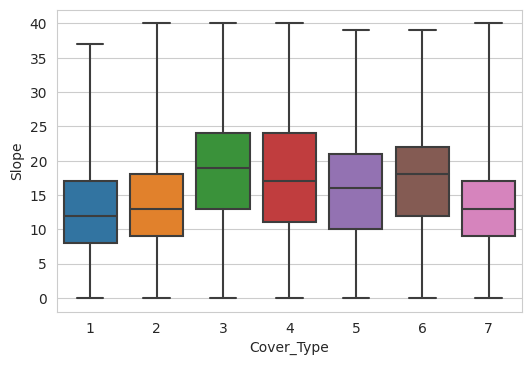

In [124]:
num_outliers(df2, "Slope", whis=3)

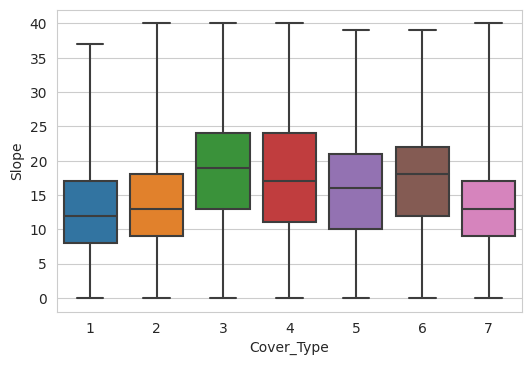

In [125]:
remove_outliers(df2, "Slope", whis=3)

Horizontal_Distance_To_Hydrology

Column_name : Horizontal_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -727.0 
max_threshold: 1177.0
Num_of_values for 1 : 26637
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -621.0 
max_threshold: 1080.0
Num_of_values for 2 : 25797
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -530.0 
max_threshold: 919.0
Num_of_values for 3 : 29592
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -543.0 
max_threshold: 724.0
Num_of_values for 4 : 33997
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -556.0 
max_threshold: 921.0
Num_of_values for 5 : 30868
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -499.0 
max_threshold: 789.0
Num_of_values for 6 : 31924
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -883.0 
max_threshold: 1399.0
N

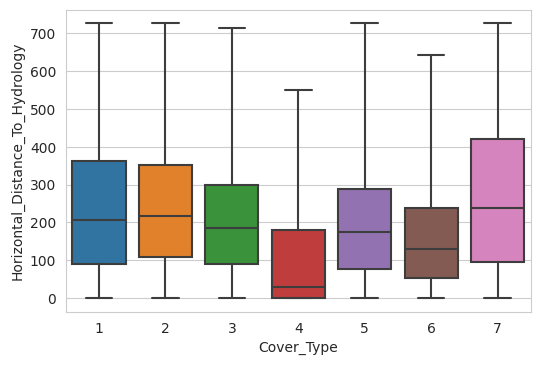

In [126]:
num_outliers(df2, "Horizontal_Distance_To_Hydrology", whis=3)

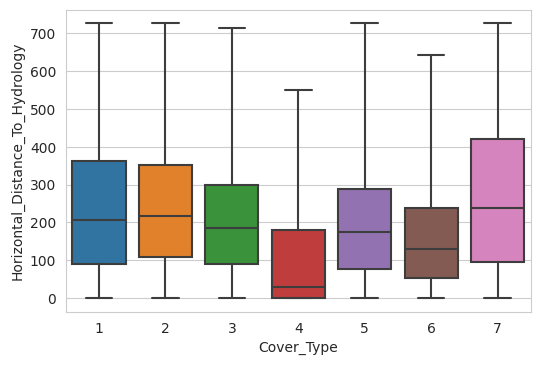

In [127]:
remove_outliers(df2, "Horizontal_Distance_To_Hydrology", whis=3)

Vertical_Distance_To_Hydrology

Column_name : Vertical_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -156.0 
max_threshold: 215.0
Num_of_values for 1 : 26637
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -155.0 
max_threshold: 223.0
Num_of_values for 2 : 25797
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -192.0 
max_threshold: 291.0
Num_of_values for 3 : 29592
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -186.0 
max_threshold: 248.0
Num_of_values for 4 : 33997
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -211.0 
max_threshold: 293.0
Num_of_values for 5 : 30868
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -179.0 
max_threshold: 255.0
Num_of_values for 6 : 31924
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -209.0 
max_threshold: 288.0
Num_of

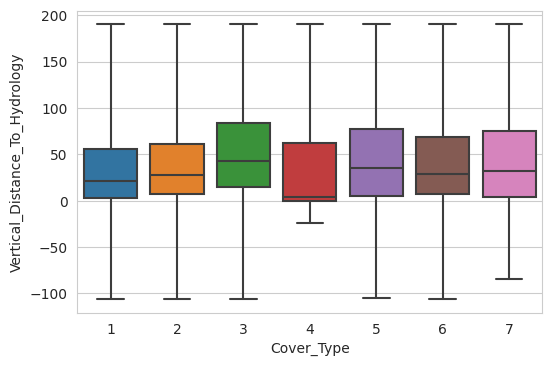

In [128]:
num_outliers(df2, "Vertical_Distance_To_Hydrology", whis=3)

Horizontal_Distance_To_Roadways

Column_name : Horizontal_Distance_To_Roadways
whis : 3
-------------------------------------------
min_threshold: -5270.0 
max_threshold: 10305.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -5620.0 
max_threshold: 10158.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -2013.0 
max_threshold: 3755.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1153.0 
max_threshold: 2998.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -4010.0 
max_threshold: 6455.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -1777.0 
max_threshold: 3760.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -4265.0 
max_thresho

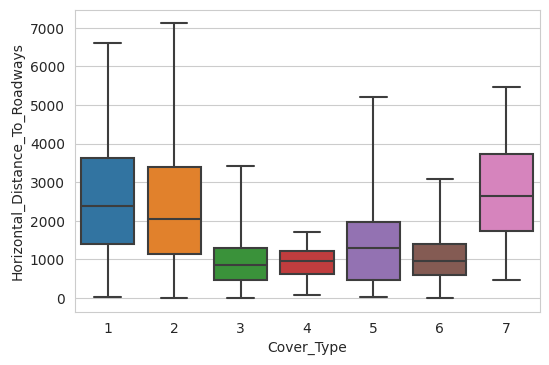

In [129]:
num_outliers(df, "Horizontal_Distance_To_Roadways", whis=3)

Hillshade_9am

Column_name : Hillshade_9am
whis : 3
-------------------------------------------
min_threshold: 102.0 
max_threshold: 326.0
Num_of_values for 1 : 26637
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: 105.0 
max_threshold: 329.0
Num_of_values for 2 : 25797
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: 33.0 
max_threshold: 390.0
Num_of_values for 3 : 29592
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 116.0 
max_threshold: 347.0
Num_of_values for 4 : 33997
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 121.0 
max_threshold: 331.0
Num_of_values for 5 : 30868
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 21.0 
max_threshold: 372.75
Num_of_values for 6 : 31924
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: 119.0 
max_threshold: 322.0
Num_of_values for 7 : 26302
Num

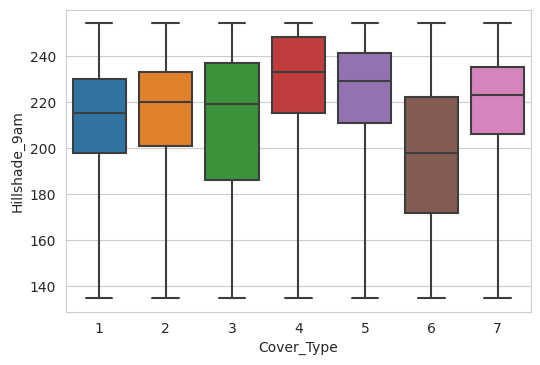

In [130]:
num_outliers(df2, "Hillshade_9am", whis=3)

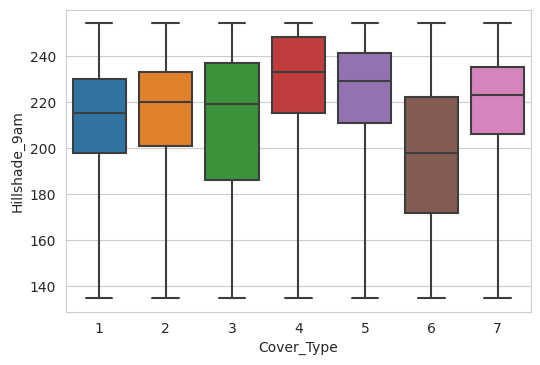

In [131]:
remove_outliers(df2, "Hillshade_9am", whis=3)

Hillshade_Noon

Column_name : Hillshade_Noon
whis : 3
-------------------------------------------
min_threshold: 148.0 
max_threshold: 302.0
Num_of_values for 1 : 26637
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: 141.0 
max_threshold: 309.0
Num_of_values for 2 : 25797
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: 100.0 
max_threshold: 345.0
Num_of_values for 3 : 29592
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 134.0 
max_threshold: 302.0
Num_of_values for 4 : 33997
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 110.0 
max_threshold: 334.0
Num_of_values for 5 : 30868
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 112.0 
max_threshold: 315.0
Num_of_values for 6 : 31924
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: 142.0 
max_threshold: 303.0
Num_of_values for 7 : 26302
N

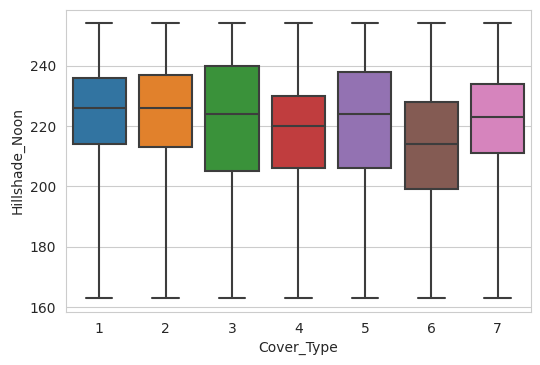

In [132]:
num_outliers(df2, "Hillshade_Noon", whis=3) 

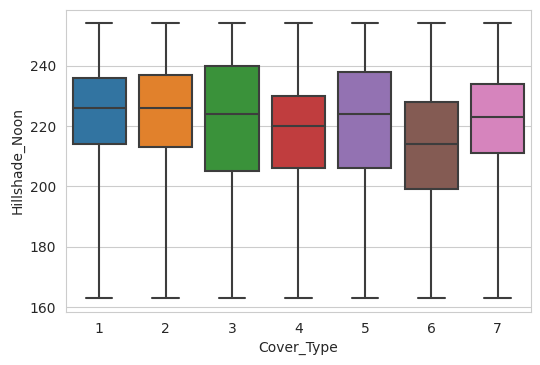

In [133]:
remove_outliers(df2, "Hillshade_Noon", whis=3)

Hillshade_3pm

Column_name : Hillshade_3pm
whis : 3
-------------------------------------------
min_threshold: -22.0 
max_threshold: 314.0
Num_of_values for 1 : 26637
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -20.0 
max_threshold: 302.0
Num_of_values for 2 : 25797
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -99.0 
max_threshold: 377.0
Num_of_values for 3 : 29592
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -136.0 
max_threshold: 361.0
Num_of_values for 4 : 33997
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -120.0 
max_threshold: 363.0
Num_of_values for 5 : 30868
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -67.0 
max_threshold: 367.0
Num_of_values for 6 : 31924
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -34.0 
max_threshold: 302.0
Num_of_values for 7 : 26302


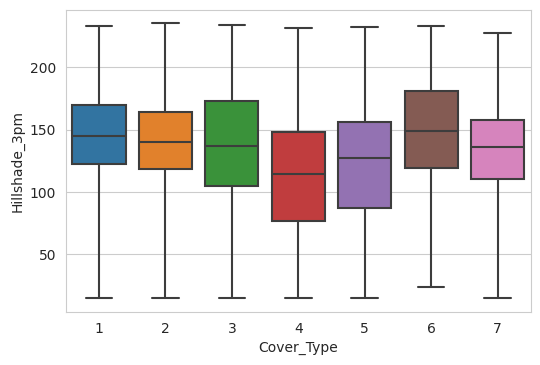

In [134]:
num_outliers(df2, "Hillshade_3pm", whis=3)

Horizontal_Distance_To_Fire_Points

Column_name : Horizontal_Distance_To_Fire_Points
whis : 3
-------------------------------------------
min_threshold: -3082.0 
max_threshold: 6585.0
Num_of_values for 1 : 26637
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -2541.0 
max_threshold: 5894.0
Num_of_values for 2 : 25797
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -1536.0 
max_threshold: 3301.0
Num_of_values for 3 : 29592
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1786.0 
max_threshold: 3548.0
Num_of_values for 4 : 33997
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -2387.0 
max_threshold: 5166.0
Num_of_values for 5 : 30868
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -1605.0 
max_threshold: 3638.0
Num_of_values for 6 : 31924
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -3407.0 
max_thresh

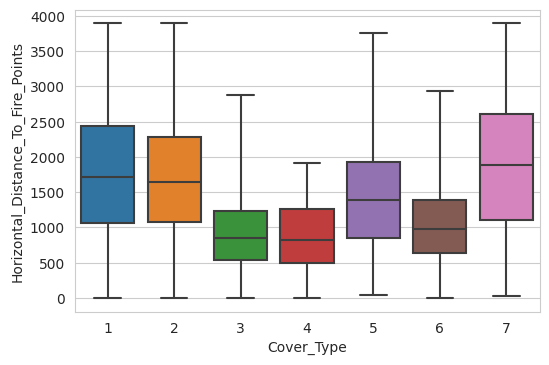

In [135]:
num_outliers(df2, "Horizontal_Distance_To_Fire_Points", whis=3)

In [136]:
df2.shape

(205117, 55)

In [137]:
df.shape

(250000, 55)

In [138]:
df2.isnull().sum().sum()

0

In [139]:
df2.dropna(inplace=True)

In [140]:
df2.isnull().sum().sum()

0

In [141]:
df2.shape[0] - df.shape[0] 

-44883

### Now, let's take a closer look at correlation of continuous columns.

***
***

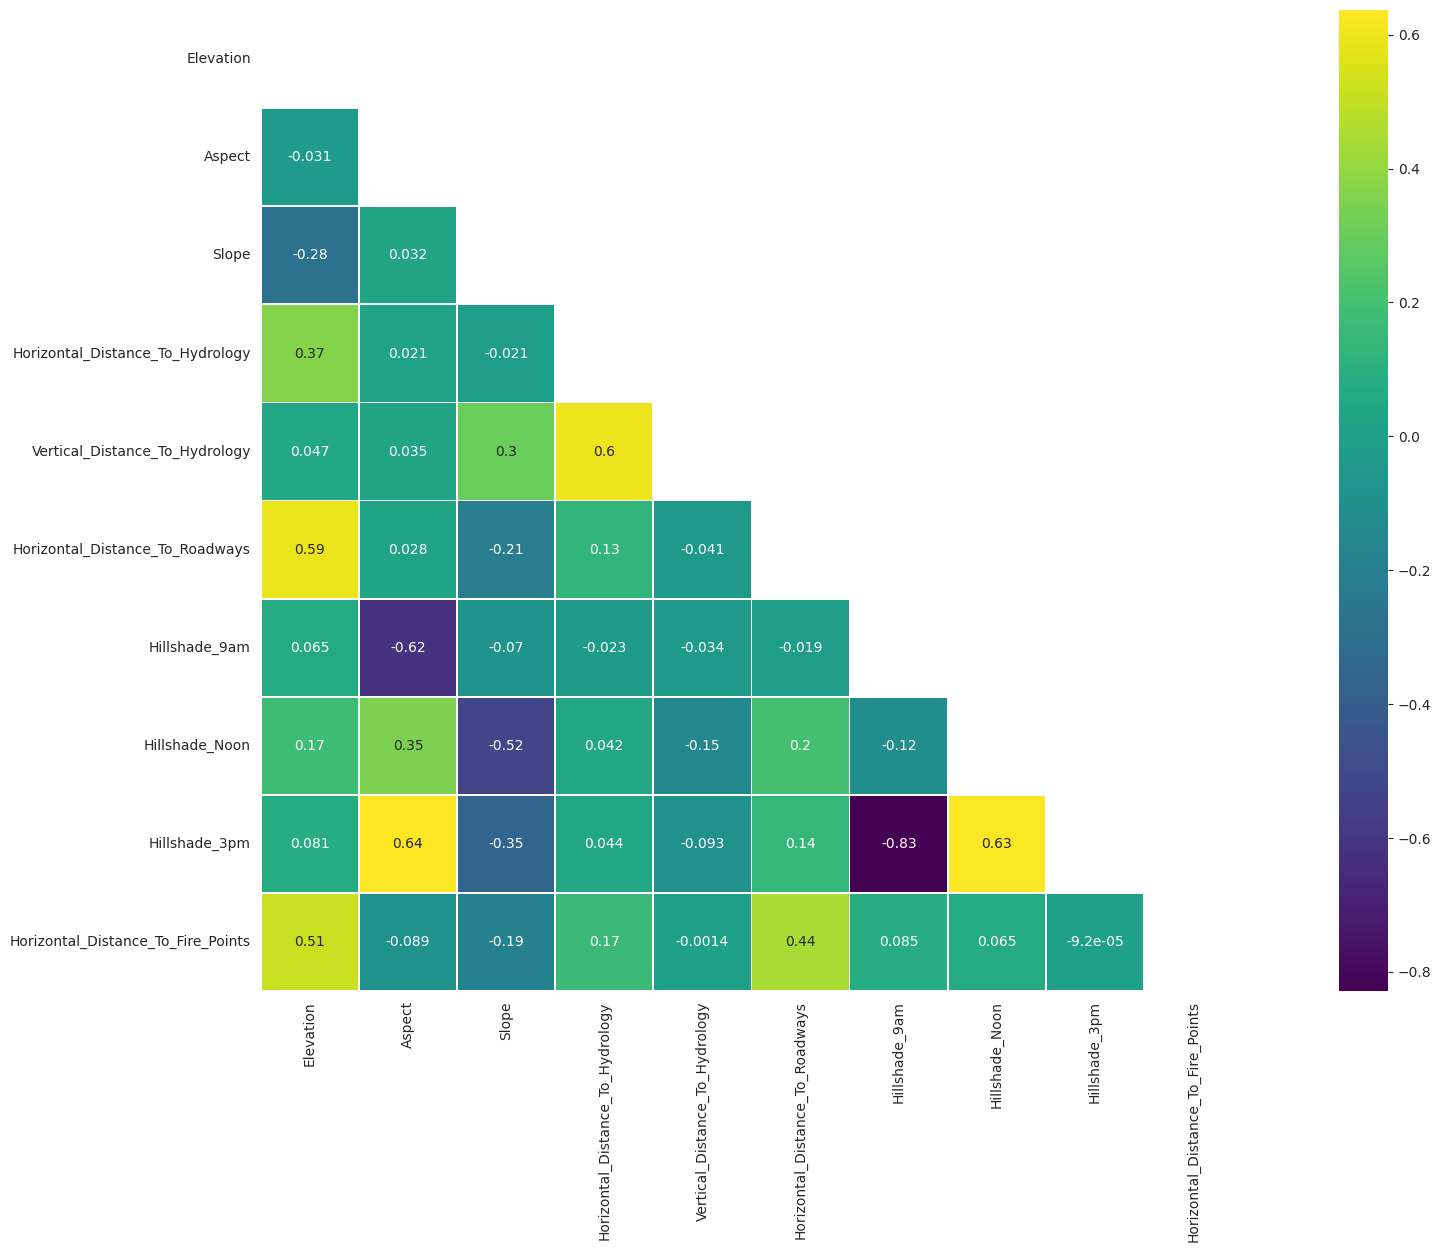

In [142]:
corr = df2[lst].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(25, 13))
sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5);

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [143]:
df2["hypo_distance"] = (df2["Horizontal_Distance_To_Hydrology"]**2 + df2["Vertical_Distance_To_Hydrology"]**2)**.5
df2["Average_Dist_Road_Hydro"] = (df2.Horizontal_Distance_To_Hydrology + df2.Horizontal_Distance_To_Roadways)/2 
df2["Average_Elevation_Hydro"] = (df2.Elevation + df1.Vertical_Distance_To_Hydrology) /2

In [144]:
df2.drop([
    "Elevation",  "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Hydrology"
], axis=1, inplace=True)

In [145]:
numeric_cols = [ col for col in df2.columns if df2[col].nunique() > 7]
numeric_cols

['Aspect',
 'Slope',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'hypo_distance',
 'Average_Dist_Road_Hydro',
 'Average_Elevation_Hydro']

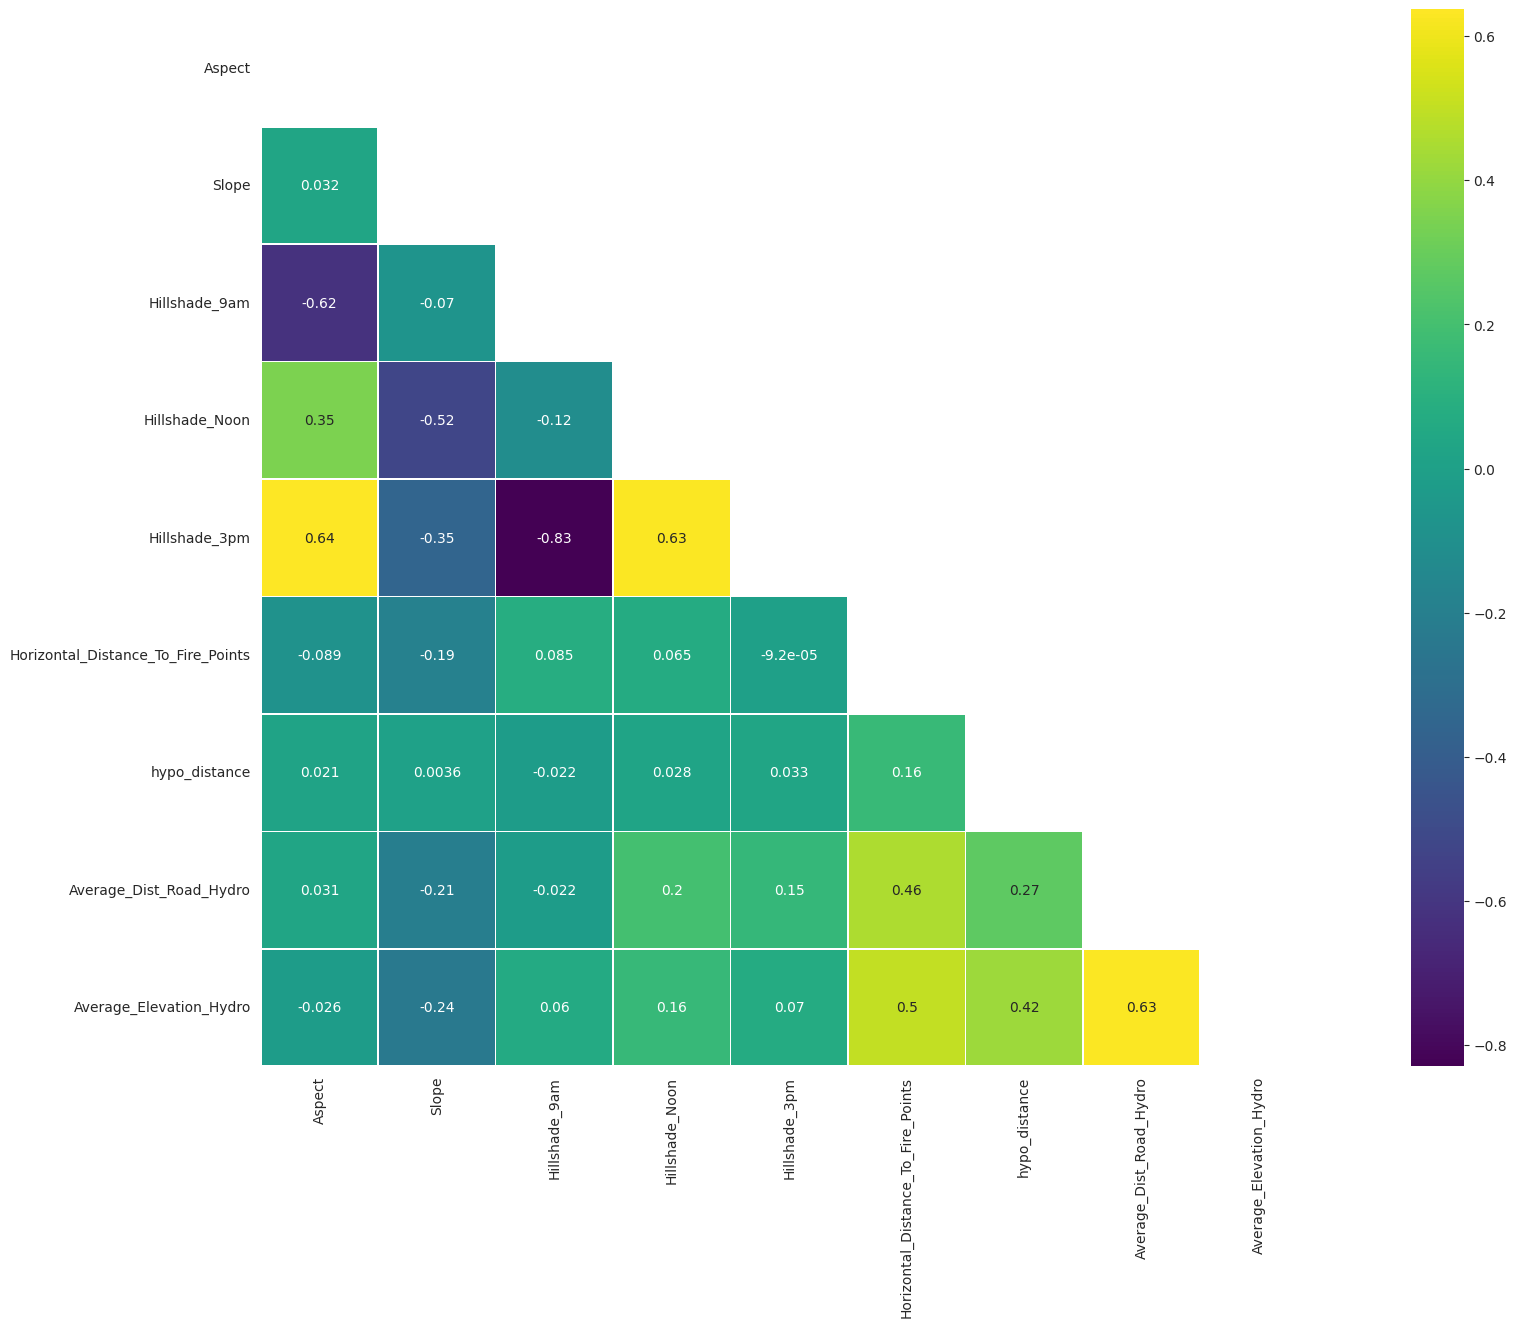

In [146]:

corr = df2[numeric_cols].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(24, 14))
sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5);

In [147]:
df2.to_csv("covtype2.csv", index = False)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [148]:
from sklearn.model_selection import train_test_split

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [149]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [151]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import MinMaxScaler

In [152]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [153]:
model_LSVC = LinearSVC(max_iter=3000)
model_LSVC.fit(X_train_scaled, y_train)
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)

In [154]:
model_LSVC.score(X_test_scaled,y_test)

0.6726133333333333

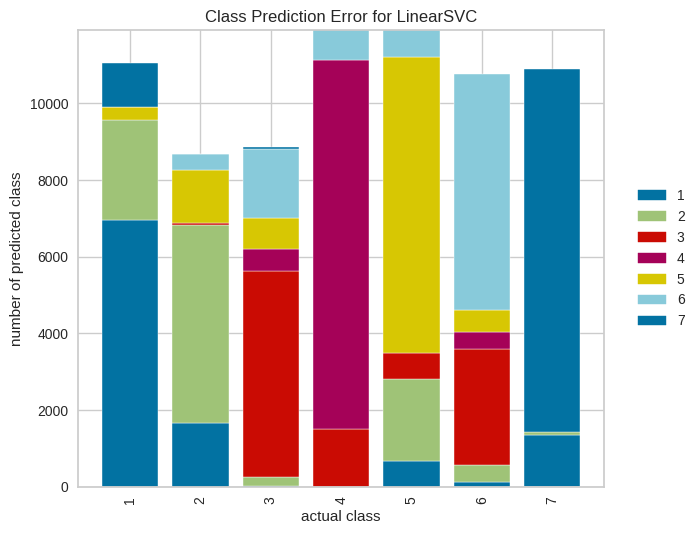

In [156]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(model_LSVC)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluating the model on the test data
visualizer.show()  # Draw visualization

In [157]:
from sklearn.ensemble import BaggingClassifier

In [158]:
model_SVC = SVC(kernel="linear")
model_baggingSVC = BaggingClassifier(model_SVC, n_jobs=-1, n_estimators=5, max_samples=0.1)
model_baggingSVC.fit(X_train_scaled, y_train)
y_pred_test = model_baggingSVC.predict(X_test_scaled)
y_pred_train = model_baggingSVC.predict(X_train_scaled)

In [159]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
 

TEST REPORT
[[7308 1750   23    0  410   59 1201]
 [2478 5669  260    4 1918  347   58]
 [   0   90 5743 1485  329 2970    0]
 [   0    0  412 9839    0  408    0]
 [ 119 1378  361    0 8624  342    0]
 [   0  223 2201  884  281 7119    0]
 [1347    1   29    0   19    0 9311]]
              precision    recall  f1-score   support

           1       0.65      0.68      0.66     10751
           2       0.62      0.53      0.57     10734
           3       0.64      0.54      0.58     10617
           4       0.81      0.92      0.86     10659
           5       0.74      0.80      0.77     10824
           6       0.63      0.66      0.65     10708
           7       0.88      0.87      0.88     10707

    accuracy                           0.71     75000
   macro avg       0.71      0.71      0.71     75000
weighted avg       0.71      0.71      0.71     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[17168  4013    48     0   962   104  2790]
 

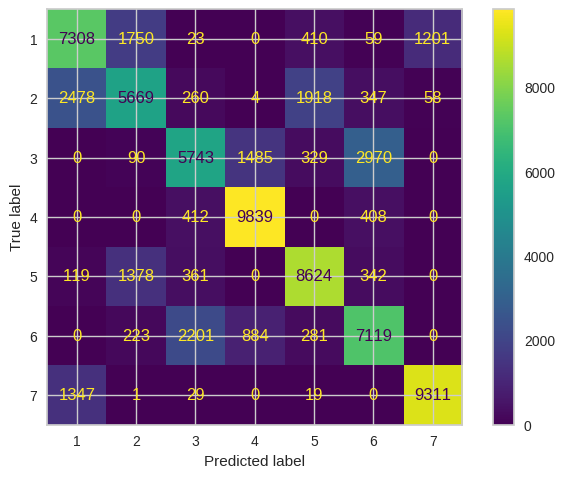

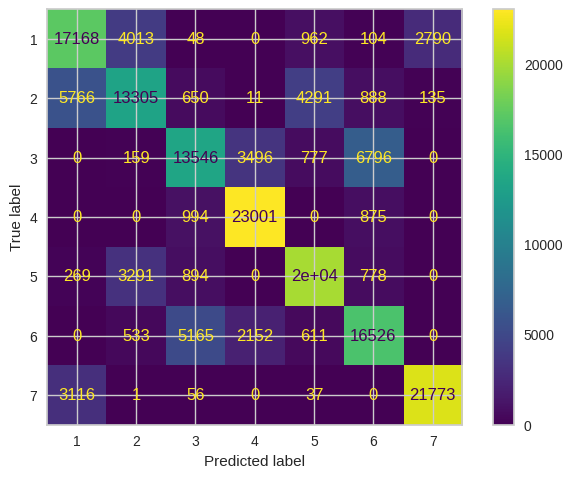

In [160]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(model_baggingSVC, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(model_baggingSVC, X_train_scaled, y_train);

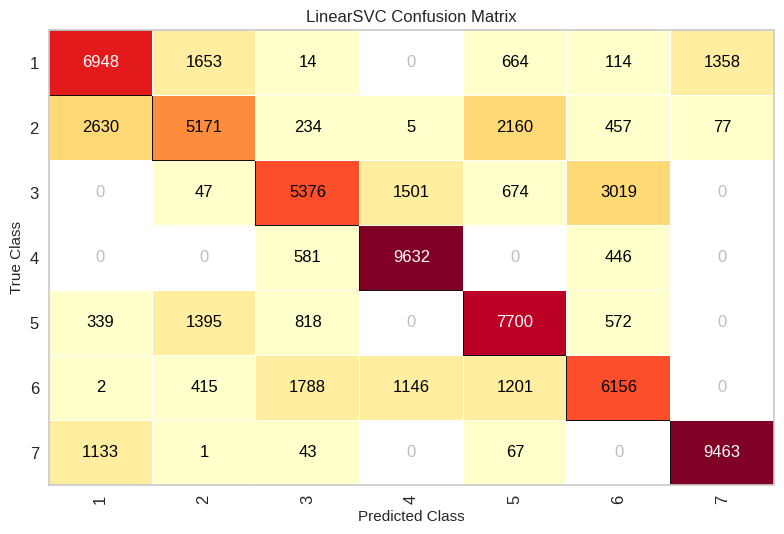

In [161]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_LSVC)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [162]:
from sklearn.metrics import f1_score, accuracy_score
scores = {}

In [163]:
y_test.shape, y_pred_test.shape

((75000,), (75000,))

In [164]:
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)
scores["model_LSVC"]={}
scores["model_LSVC"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_LSVC"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_LSVC"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_LSVC"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
scores


{'model_LSVC': {'accuracy_score_test': 0.6726133333333333,
  'accuracy_score_train': 0.6743314285714286,
  'f1_score_test': 0.6674965320901135,
  'f1_score_train': 0.6690097116264427}}

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train , y_train)


DecisionTreeClassifier()

In [167]:
y_pred_test = model_Tree.predict(X_test)
y_pred_train = model_Tree.predict(X_train)
scores["model_Tree"]={}
scores["model_Tree"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)


In [168]:
scores["model_LSVC"], scores["model_Tree"],

({'accuracy_score_test': 0.6726133333333333,
  'accuracy_score_train': 0.6743314285714286,
  'f1_score_test': 0.6674965320901135,
  'f1_score_train': 0.6690097116264427},
 {'accuracy_score_test': 0.9323333333333333,
  'accuracy_score_train': 1.0,
  'f1_score_test': 0.932072912605526,
  'f1_score_train': 1.0})

In [169]:
pd.DataFrame(scores)[["model_Tree","model_LSVC"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_Tree,0.9320729126,1.0000000000,0.9323333333,1.0000000000
model_LSVC,0.6674965321,0.6690097116,0.6726133333,0.6743314286


In [170]:
def eval_model(model,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train):
    cm = ConfusionMatrix(model)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()
    print("TEST REPORT")
    # print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    cm.score(X_train, y_train)
    cm.show()
    # print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))

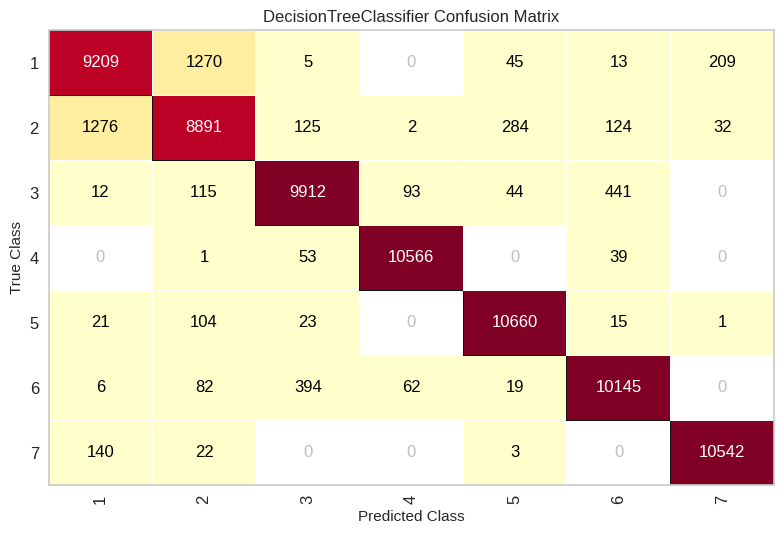

TEST REPORT
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10751
           2       0.85      0.83      0.84     10734
           3       0.94      0.93      0.94     10617
           4       0.99      0.99      0.99     10659
           5       0.96      0.98      0.97     10824
           6       0.94      0.95      0.94     10708
           7       0.98      0.98      0.98     10707

    accuracy                           0.93     75000
   macro avg       0.93      0.93      0.93     75000
weighted avg       0.93      0.93      0.93     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     25085
           2       1.00      1.00      1.00     25046
           3       1.00      1.00      1.00     24774
           4       1.00      1.00      1.00     24870
           5       1.00      1.00      1.0

In [171]:
eval_model(model_Tree,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [172]:
model = DecisionTreeClassifier(random_state=101)
from sklearn.model_selection import   cross_validate
scoress = cross_validate(model, X_train, y_train, scoring = ["accuracy", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scoress, index = range(1, 11))


In [173]:
df_scores.iloc[:,2:],df_scores.iloc[:,2:].mean()

(    test_accuracy  test_f1_macro
 1    0.9310285714   0.9307981152
 2    0.9256571429   0.9254511192
 3    0.9287428571   0.9284942862
 4    0.9258857143   0.9256164779
 5    0.9288000000   0.9284874436
 6    0.9278285714   0.9275034278
 7    0.9281714286   0.9278402962
 8    0.9288571429   0.9286725571
 9    0.9281142857   0.9277108458
 10   0.9291428571   0.9287820333, test_accuracy   0.9282228571
 test_f1_macro   0.9279356602
 dtype: float64)

In [174]:
from sklearn.model_selection import GridSearchCV

In [180]:
model = DecisionTreeClassifier()
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}
model_Tree_gs = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_macro',
                          cv=5,
                          n_jobs = 1)
model_Tree_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_macro')

In [182]:
model_Tree_gs.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [183]:
model_Tree_gs.best_score_


0.9226697706349534

In [184]:
model_Tree_tuned = DecisionTreeClassifier(max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split = 2, splitter='best')
model_Tree_tuned.fit(X_train , y_train)

DecisionTreeClassifier()

In [185]:
y_pred_test = model_Tree_tuned.predict(X_test)
y_pred_train = model_Tree_tuned.predict(X_train)
scores["model_Tree_tuned"]={}
scores["model_Tree_tuned"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_tuned"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_tuned"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_tuned"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
# 

In [186]:
pd.DataFrame(scores)

,model_LSVC,model_Tree,model_Tree_tuned
f1_score_test,0.6674965321,0.9320729126,0.9318645388
f1_score_train,0.6690097116,1.0000000000,1.0000000000
accuracy_score_test,0.6726133333,0.9323333333,0.9321200000
accuracy_score_train,0.6743314286,1.0000000000,1.0000000000


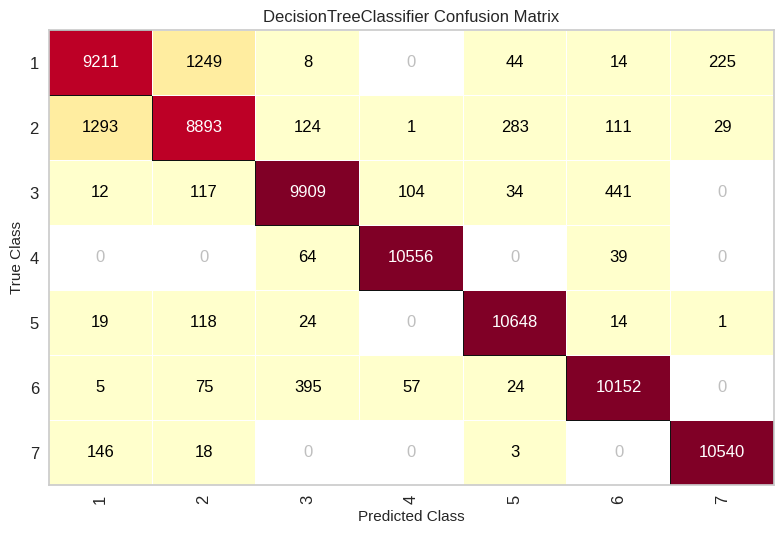

TEST REPORT
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10751
           2       0.85      0.83      0.84     10734
           3       0.94      0.93      0.94     10617
           4       0.98      0.99      0.99     10659
           5       0.96      0.98      0.97     10824
           6       0.94      0.95      0.95     10708
           7       0.98      0.98      0.98     10707

    accuracy                           0.93     75000
   macro avg       0.93      0.93      0.93     75000
weighted avg       0.93      0.93      0.93     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     25085
           2       1.00      1.00      1.00     25046
           3       1.00      1.00      1.00     24774
           4       1.00      1.00      1.00     24870
           5       1.00      1.00      1.0

In [187]:
eval_model(model_Tree_tuned,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [188]:
model_Tree_bagg = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=20)

model_Tree_bagg.fit(X_train , y_train)
y_pred_test = model_Tree_bagg.predict(X_test)
y_pred_train = model_Tree_bagg.predict(X_train)
print(
    "f1_train:", f1_score(y_train,y_pred_train,average="macro"),
    "f1_test:", f1_score(y_test,y_pred_test,average="macro"),
    "\n",
    "Accuracy_train:", accuracy_score(y_train,y_pred_train),
    "Accuracy_test:", accuracy_score(y_test,y_pred_test)    
      )

f1_train: 0.9297938693759897 f1_test: 0.9096509933236775 
 Accuracy_train: 0.9308457142857143 Accuracy_test: 0.9112666666666667


In [189]:
scores["model_Tree_bagg"]={}
scores["model_Tree_bagg"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_bagg"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_bagg"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_bagg"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_LSVC,0.6674965321,0.6690097116,0.6726133333,0.6743314286
model_Tree,0.9320729126,1.0000000000,0.9323333333,1.0000000000
model_Tree_tuned,0.9318645388,1.0000000000,0.9321200000,1.0000000000
model_Tree_bagg,0.9096509933,0.9297938694,0.9112666667,0.9308457143


### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [190]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100)

model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [191]:
y_pred_test = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)

scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg","model_RF"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_LSVC,0.6674965321,0.6690097116,0.6726133333,0.6743314286
model_Tree,0.9320729126,1.0000000000,0.9323333333,1.0000000000
model_Tree_tuned,0.9318645388,1.0000000000,0.9321200000,1.0000000000
model_Tree_bagg,0.9096509933,0.9297938694,0.9112666667,0.9308457143
model_RF,0.9593688669,1.0000000000,0.9596666667,1.0000000000


In [192]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="f1_macro",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 16],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='f1_macro', verbose=2)

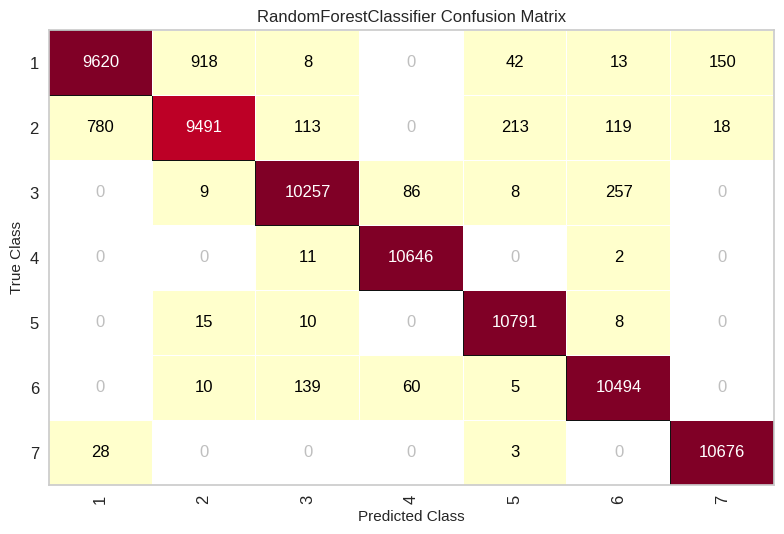

TEST REPORT
              precision    recall  f1-score   support

           1       0.92      0.89      0.91     10751
           2       0.91      0.88      0.90     10734
           3       0.97      0.97      0.97     10617
           4       0.99      1.00      0.99     10659
           5       0.98      1.00      0.99     10824
           6       0.96      0.98      0.97     10708
           7       0.98      1.00      0.99     10707

    accuracy                           0.96     75000
   macro avg       0.96      0.96      0.96     75000
weighted avg       0.96      0.96      0.96     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     25085
           2       1.00      1.00      1.00     25046
           3       1.00      1.00      1.00     24774
           4       1.00      1.00      1.00     24870
           5       1.00      1.00      1.0

In [193]:
eval_model(model_RF,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)


In [194]:
model = model_RF
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

In [195]:
pd.DataFrame(scores)

,model_LSVC,model_Tree,model_Tree_tuned,model_Tree_bagg,model_RF
f1_score_test,0.6674965321,0.9320729126,0.9318645388,0.9096509933,0.9593688669
f1_score_train,0.6690097116,1.0000000000,1.0000000000,0.9297938694,1.0000000000
accuracy_score_test,0.6726133333,0.9323333333,0.9321200000,0.9112666667,0.9596666667
accuracy_score_train,0.6743314286,1.0000000000,1.0000000000,0.9308457143,1.0000000000


### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [196]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier().fit(X_train , y_train)
y_pred_test = model_XGB.predict(X_test)
y_pred_train = model_XGB.predict(X_train)
scores["model_XGB"]={}
scores["model_XGB"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_XGB"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_XGB"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_XGB"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)

,model_LSVC,model_Tree,model_Tree_tuned,model_Tree_bagg,model_RF,model_XGB
f1_score_test,0.6674965321,0.9320729126,0.9318645388,0.9096509933,0.9593688669,0.7585596336
f1_score_train,0.6690097116,1.0000000000,1.0000000000,0.9297938694,1.0000000000,0.7610074884
accuracy_score_test,0.6726133333,0.9323333333,0.9321200000,0.9112666667,0.9596666667,0.7664800000
accuracy_score_train,0.6743314286,1.0000000000,1.0000000000,0.9308457143,1.0000000000,0.7685485714


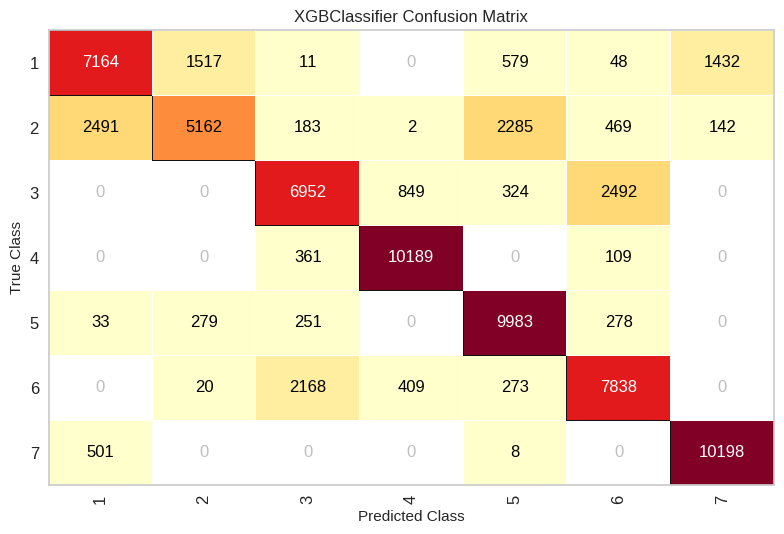

TEST REPORT
              precision    recall  f1-score   support

           1       0.70      0.67      0.68     10751
           2       0.74      0.48      0.58     10734
           3       0.70      0.65      0.68     10617
           4       0.89      0.96      0.92     10659
           5       0.74      0.92      0.82     10824
           6       0.70      0.73      0.71     10708
           7       0.87      0.95      0.91     10707

    accuracy                           0.77     75000
   macro avg       0.76      0.77      0.76     75000
weighted avg       0.76      0.77      0.76     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.71      0.68      0.69     25085
           2       0.75      0.49      0.59     25046
           3       0.70      0.66      0.68     24774
           4       0.89      0.96      0.92     24870
           5       0.75      0.92      0.8

In [197]:
eval_model(model_XGB,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)


In [198]:
fi = pd.DataFrame(model_XGB.feature_importances_, index=list(X_train.columns), columns=["fi"])
fi = fi.sort_values("fi",ascending=False)
fi

,fi
Elevation,0.1320108324
Wilderness_Area_4,0.0924135372
Soil_Type_10,0.0605698302
Soil_Type_30,0.0601575524
Soil_Type_3,0.0543088540
Soil_Type_12,0.0484801568
Hillshade_9am,0.0395913944
Soil_Type_29,0.0355252400
Wilderness_Area_1,0.0304788351
Horizontal_Distance_To_Hydrology,0.0296719875


### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

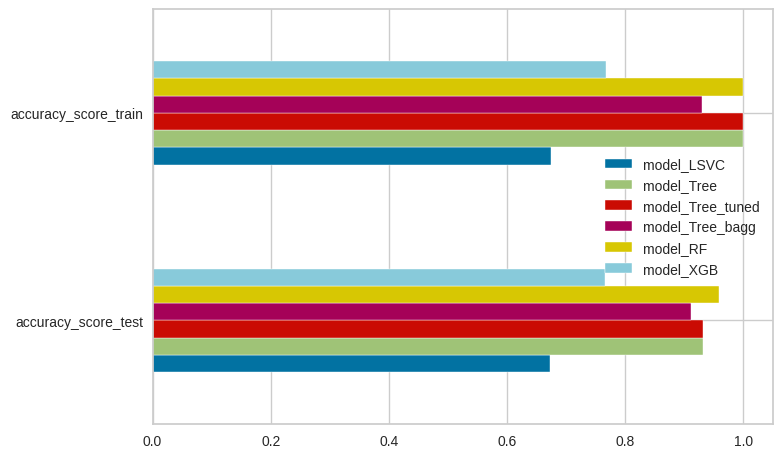

In [199]:
comp = pd.DataFrame(scores)
comp.loc[["accuracy_score_test","accuracy_score_train"]].plot.barh()

# F1 Score Comparison

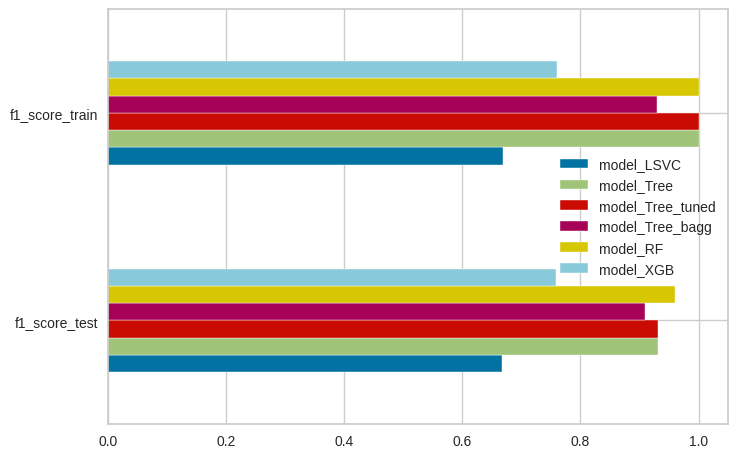

In [200]:
comp.loc[["f1_score_test","f1_score_train"]].plot.barh()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___